## Data Sourcing
I began searching for some interesting datasets on Kaggle where I can apply my chosen algorithms, and I was looking specifically for a mostly-numeric dataset where I can use classification algorithms properly in the field of finance and business

In [169]:
import pickle
import spacy
import pandas as pd
from sklearn.metrics import accuracy_score
from langdetect import detect
import text_hammer as th
from nltk.stem.wordnet import WordNetLemmatizer
import seaborn as sns
import missingno as msno
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.metrics import hamming_loss
from skmultilearn.problem_transform import BinaryRelevance
import nltk
from sklearn.model_selection import train_test_split
import numpy as np
from textblob import Word
nlp = spacy.load("en_core_web_sm")

In [170]:

df_companies2= pd.read_csv("Datasets/Companies Final dataset.csv")
df_companies = pd.read_csv("Datasets/companies.csv")

In [171]:
# The info() method prints information about the DataFrame. The information contains the number of columns, column labels, columndata types, memory usage, range index, and the number of cells in each column (non-null values).
df_companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6368 entries, 0 to 6367
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ticker        6368 non-null   object 
 1   company name  6368 non-null   object 
 2   short name    6368 non-null   object 
 3   industry      5418 non-null   object 
 4   description   6207 non-null   object 
 5   website       6278 non-null   object 
 6   logo          4577 non-null   object 
 7   ceo           5106 non-null   object 
 8   exchange      6368 non-null   object 
 9   market cap    6367 non-null   float64
 10  sector        5418 non-null   object 
 11  tag 1         5424 non-null   object 
 12  tag 2         5424 non-null   object 
 13  tag 3         3295 non-null   object 
dtypes: float64(1), object(13)
memory usage: 696.6+ KB


In [172]:
df_companies

,ticker,company name,short name,industry,description,website,logo,ceo,exchange,market cap,sector,tag 1,tag 2,tag 3
0,A,Agilent Technologies Inc.,Agilent,Medical Diagnostics & Research,Agilent Technologies Inc is engaged in life sc...,http://www.agilent.com,A.png,Michael R. McMullen,New York Stock Exchange,2.421807e+10,Healthcare,Healthcare,Diagnostics & Research,Medical Diagnostics & Research
1,AA,Alcoa Corporation,Alcoa,Metals & Mining,Alcoa Corp is an integrated aluminum company. ...,http://www.alcoa.com,AA.png,Roy Christopher Harvey,New York Stock Exchange,5.374967e+09,Basic Materials,Basic Materials,Aluminum,Metals & Mining
2,AABA,Altaba Inc.,Altaba,Asset Management,"Altaba Inc is an independent, non-diversified,...",http://www.altaba.com,AABA.png,Thomas J. Mcinerney,Nasdaq Global Select,4.122368e+10,Financial Services,Financial Services,Asset Management,NaN
3,AAC,AAC Holdings Inc.,AAC,Health Care Providers,AAC Holdings Inc provides inpatient and outpat...,http://www.americanaddictioncenters.org,NaN,Michael T. Cartwright,New York Stock Exchange,6.372010e+07,Healthcare,Healthcare,Medical Care,Health Care Providers
4,AADR,AdvisorShares Dorsey Wright ADR,AdvisorShares Dorsey Wright,NaN,The investment seeks long-term capital appreci...,http://www.advisorshares.com,AADR.png,NaN,NYSE Arca,1.031612e+08,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6363,ZTS,Zoetis Inc. Class A,Zoetis,Drug Manufacturers,Zoetis Inc is a developer and manufacturer of ...,http://www.zoetis.com,ZTS.png,Juan Ramon Alaix,New York Stock Exchange,4.205627e+10,Healthcare,Healthcare,Drug Manufacturers - Specialty & Generic,Drug Manufacturers
6364,ZUMZ,Zumiez Inc.,Zumiez,Retail - Apparel & Specialty,Zumiez Inc is a multi-channel specialty retail...,http://www.zumiez.com,ZUMZ.png,Richard M. Brooks,Nasdaq Global Select,6.150368e+08,Consumer Cyclical,Consumer Cyclical,Specialty Retail,Retail - Apparel & Specialty
6365,ZUO,Zuora Inc. Class A,Zuora,Application Software,Zuora Inc provides cloud-based software on a s...,https://www.zuora.com,ZUO.png,Tien Tzuo,New York Stock Exchange,2.304595e+09,Technology,Technology,Software - Infrastructure,Application Software
6366,ZYME,Zymeworks Inc.,Zymeworks,Biotechnology,Zymeworks Inc is a clinical-stage biopharmaceu...,http://www.zymeworks.com,ZYME.png,Ali Tehrani,New York Stock Exchange,5.042878e+08,Healthcare,Healthcare,Biotechnology,NaN


In [173]:
df_companies2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6309 entries, 0 to 6308
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Name                  6308 non-null   object
 1   description           5641 non-null   object
 2   logo                  5247 non-null   object
 3   Colors                5732 non-null   object
 4   Linkedin              4665 non-null   object
 5   Discription-Linkedin  3819 non-null   object
dtypes: object(6)
memory usage: 295.9+ KB


In [174]:
df_companies2

,Name,description,logo,Colors,Linkedin,Discription-Linkedin
0,iShares Silver Trust,We're committed to matching the ambitions of o...,https://asset.brandfetch.io/idsVjieL5B/idBUv3l...,"#000000,#FFFFFF,#00a9e0,#F78BDB",https://linkedin.com/company/ishares,As a global leader in exchange traded funds (E...
1,iShares U.S. Basic Materials,We're committed to matching the ambitions of o...,https://asset.brandfetch.io/idsVjieL5B/idBUv3l...,"#000000,#FFFFFF,#00a9e0,#F78BDB",https://linkedin.com/company/ishares,As a global leader in exchange traded funds (E...
2,Bank OZK,"Welcome to Bank OZK, formerly Bank of the Ozar...",https://asset.brandfetch.io/idEw_lN0kT/idwf6WR...,"#414141,#ffffff,#e40046",https://linkedin.com/company/bank-ozk,"We’re Bank OZK, connecting the great service y..."
3,Victory Capital Holdings Inc.,Victory Capital is a multi-boutique asset mana...,https://asset.brandfetch.io/idTEgoBDo3/idz47vf...,"#116699,#ffffff,#5c89b4",https://linkedin.com/company/victory-capital-m...,Victory Capital is a diversified global asset ...
4,Iron Mountain Incorporated (Delaware)Common St...,Iron Mountain provides online backup and data ...,https://asset.brandfetch.io/id9ylgNaV/idiPXfki...,#00548f,https://linkedin.com/company/iron-mountain,Iron Mountain Incorporated (NYSE: IRM) is a gl...
...,...,...,...,...,...,...
6304,Geospace Technologies Corporation,Geospace Technologies Corporation has been bri...,https://asset.brandfetch.io/idRuXvilCp/idrLWMI...,"#003172,#3499cd,#787979",https://linkedin.com/company/geospace-technolo...,NaN
6305,Fly Leasing Limited,FLY Leasing Limited (“FLY Leasing”) is a leadi...,https://asset.brandfetch.io/idyMB_KWSe/idt2M-n...,"#363636,#ffffff,#74990b",NaN,NaN
6306,Liberty All-Star Equity Fund,Liberty All-Star Fund is an institutional-qual...,NaN,"#1b242b,#ffffff,#395d77",NaN,NaN
6307,Viad Corp,Viad is an S&P smallcap 600 company.,https://asset.brandfetch.io/idAhDI3F2a/id7VOaM...,"#070512,#ca3dfe,#056db7",https://linkedin.com/company/viad-corp,NaN


In [175]:
df_companies2.rename(columns = {'Name':'company name', }, inplace = True)

In [176]:
df_finalCompanies = df_companies2.merge(df_companies, on="company name", how = 'inner')
df_finalCompanies.drop_duplicates()
df_finalCompanies

,company name,description_x,logo_x,Colors,Linkedin,Discription-Linkedin,ticker,short name,industry,description_y,website,logo_y,ceo,exchange,market cap,sector,tag 1,tag 2,tag 3
0,iShares Silver Trust,We're committed to matching the ambitions of o...,https://asset.brandfetch.io/idsVjieL5B/idBUv3l...,"#000000,#FFFFFF,#00a9e0,#F78BDB",https://linkedin.com/company/ishares,As a global leader in exchange traded funds (E...,SLV,iShares Silver Trust,NaN,The investment seeks to reflect generally the ...,http://www.ishares.com,SLV.png,NaN,NYSE Arca,4.917748e+09,NaN,NaN,NaN,NaN
1,iShares U.S. Basic Materials,We're committed to matching the ambitions of o...,https://asset.brandfetch.io/idsVjieL5B/idBUv3l...,"#000000,#FFFFFF,#00a9e0,#F78BDB",https://linkedin.com/company/ishares,As a global leader in exchange traded funds (E...,IYM,iShares U.S. Basic Materials,NaN,The investment seeks to track the investment r...,http://www.ishares.com,IYM.png,NaN,NYSE Arca,4.293600e+08,NaN,NaN,NaN,NaN
2,Bank OZK,"Welcome to Bank OZK, formerly Bank of the Ozar...",https://asset.brandfetch.io/idEw_lN0kT/idwf6WR...,"#414141,#ffffff,#e40046",https://linkedin.com/company/bank-ozk,"We’re Bank OZK, connecting the great service y...",OZK,Bank OZK,Banks,Bank of the Ozarks Inc operates in the financi...,http://www.ozk.com,OZK.png,George Gleason,Nasdaq Global Select,4.097643e+09,Financial Services,Financial Services,Banks - Regional - US,Banks
3,Victory Capital Holdings Inc.,Victory Capital is a multi-boutique asset mana...,https://asset.brandfetch.io/idTEgoBDo3/idz47vf...,"#116699,#ffffff,#5c89b4",https://linkedin.com/company/victory-capital-m...,Victory Capital is a diversified global asset ...,VCTR,Victory Capital,Asset Management,Victory Capital Holdings Inc is an investment ...,https://www.vcm.com,VCTR.png,David C. Brown,Nasdaq Global Select,7.445188e+08,Financial Services,Financial Services,Asset Management,NaN
4,Iron Mountain Incorporated (Delaware)Common St...,Iron Mountain provides online backup and data ...,https://asset.brandfetch.io/id9ylgNaV/idiPXfki...,#00548f,https://linkedin.com/company/iron-mountain,Iron Mountain Incorporated (NYSE: IRM) is a gl...,IRM,Iron Mountain Incorporated (Delaware)Common St...,Business Services,"Iron Mountain Inc provides records, informatio...",http://www.ironmountain.com,IRM.png,William L. Meaney,New York Stock Exchange,1.057295e+10,Industrials,Industrials,Business Services,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6318,Geospace Technologies Corporation,Geospace Technologies Corporation has been bri...,https://asset.brandfetch.io/idRuXvilCp/idrLWMI...,"#003172,#3499cd,#787979",https://linkedin.com/company/geospace-technolo...,NaN,GEOS,Geospace,Oil & Gas - Services,Geospace Technologies Corp is engaged in desig...,http://www.geospace.com,GEOS.png,Walter R. Wheeler,Nasdaq Global Select,2.043555e+08,Energy,Energy,Oil & Gas Equipment & Services,Oil & Gas - Services
6319,Fly Leasing Limited,FLY Leasing Limited (“FLY Leasing”) is a leadi...,https://asset.brandfetch.io/idyMB_KWSe/idt2M-n...,"#363636,#ffffff,#74990b",NaN,NaN,FLY,Fly Leasing Limited,Consulting & Outsourcing,Fly Leasing Ltd is principally engaged in purc...,http://www.flyleasing.com,FLY.png,Colm Barrington,New York Stock Exchange,3.598032e+08,Industrials,Industrials,Rental & Leasing Services,Consulting & Outsourcing
6320,Liberty All-Star Equity Fund,Liberty All-Star Fund is an institutional-qual...,NaN,"#1b242b,#ffffff,#395d77",NaN,NaN,USA,Liberty All-Star Equity Fund,Asset Management,Liberty All Star Equity Fund is a closed end f...,http://www.all-starfunds.com,NaN,William R. Parmentier,New York Stock Exchange,1.172164e+09,Financial Services,Financial Services,Asset Management,NaN
6321,Viad Corp,Viad is an S&P smallcap 600 company.,https://asset.brandfetch.io/idAhDI3F2a/id7VOaM...,"#070512,#ca3dfe,#056db7",https://linkedin.com/company/viad-corp,NaN,VVI,Viad,Business Services,Viad Corp is a United States based marketing c...,

In [177]:
df_finalCompanies=df_finalCompanies[["company name","short name","industry","sector","Colors","logo_x","logo_y","Linkedin","description_x","description_y","Discription-Linkedin"]]
df_finalCompanies.rename(columns = {'Colors':'colors','logo_x':'logo_url','logo_y':'logo','description_x':'description_Brandfetch','description_y': 'description','Discription-Linkedin': 'description_Linkedin'}, inplace = True)
df_finalCompanies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6323 entries, 0 to 6322
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   company name            6323 non-null   object
 1   short name              6323 non-null   object
 2   industry                5406 non-null   object
 3   sector                  5406 non-null   object
 4   colors                  5743 non-null   object
 5   logo_url                5262 non-null   object
 6   logo                    4619 non-null   object
 7   Linkedin                4704 non-null   object
 8   description_Brandfetch  5655 non-null   object
 9   description             6204 non-null   object
 10  description_Linkedin    3852 non-null   object
dtypes: object(11)
memory usage: 592.8+ KB


C:\Users\Ammar Almasri\AppData\Local\Temp\ipykernel_18612\2468292450.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_finalCompanies.rename(columns = {'Colors':'colors','logo_x':'logo_url','logo_y':'logo','description_x':'description_Brandfetch','description_y': 'description','Discription-Linkedin': 'description_Linkedin'}, inplace = True)


<AxesSubplot: >

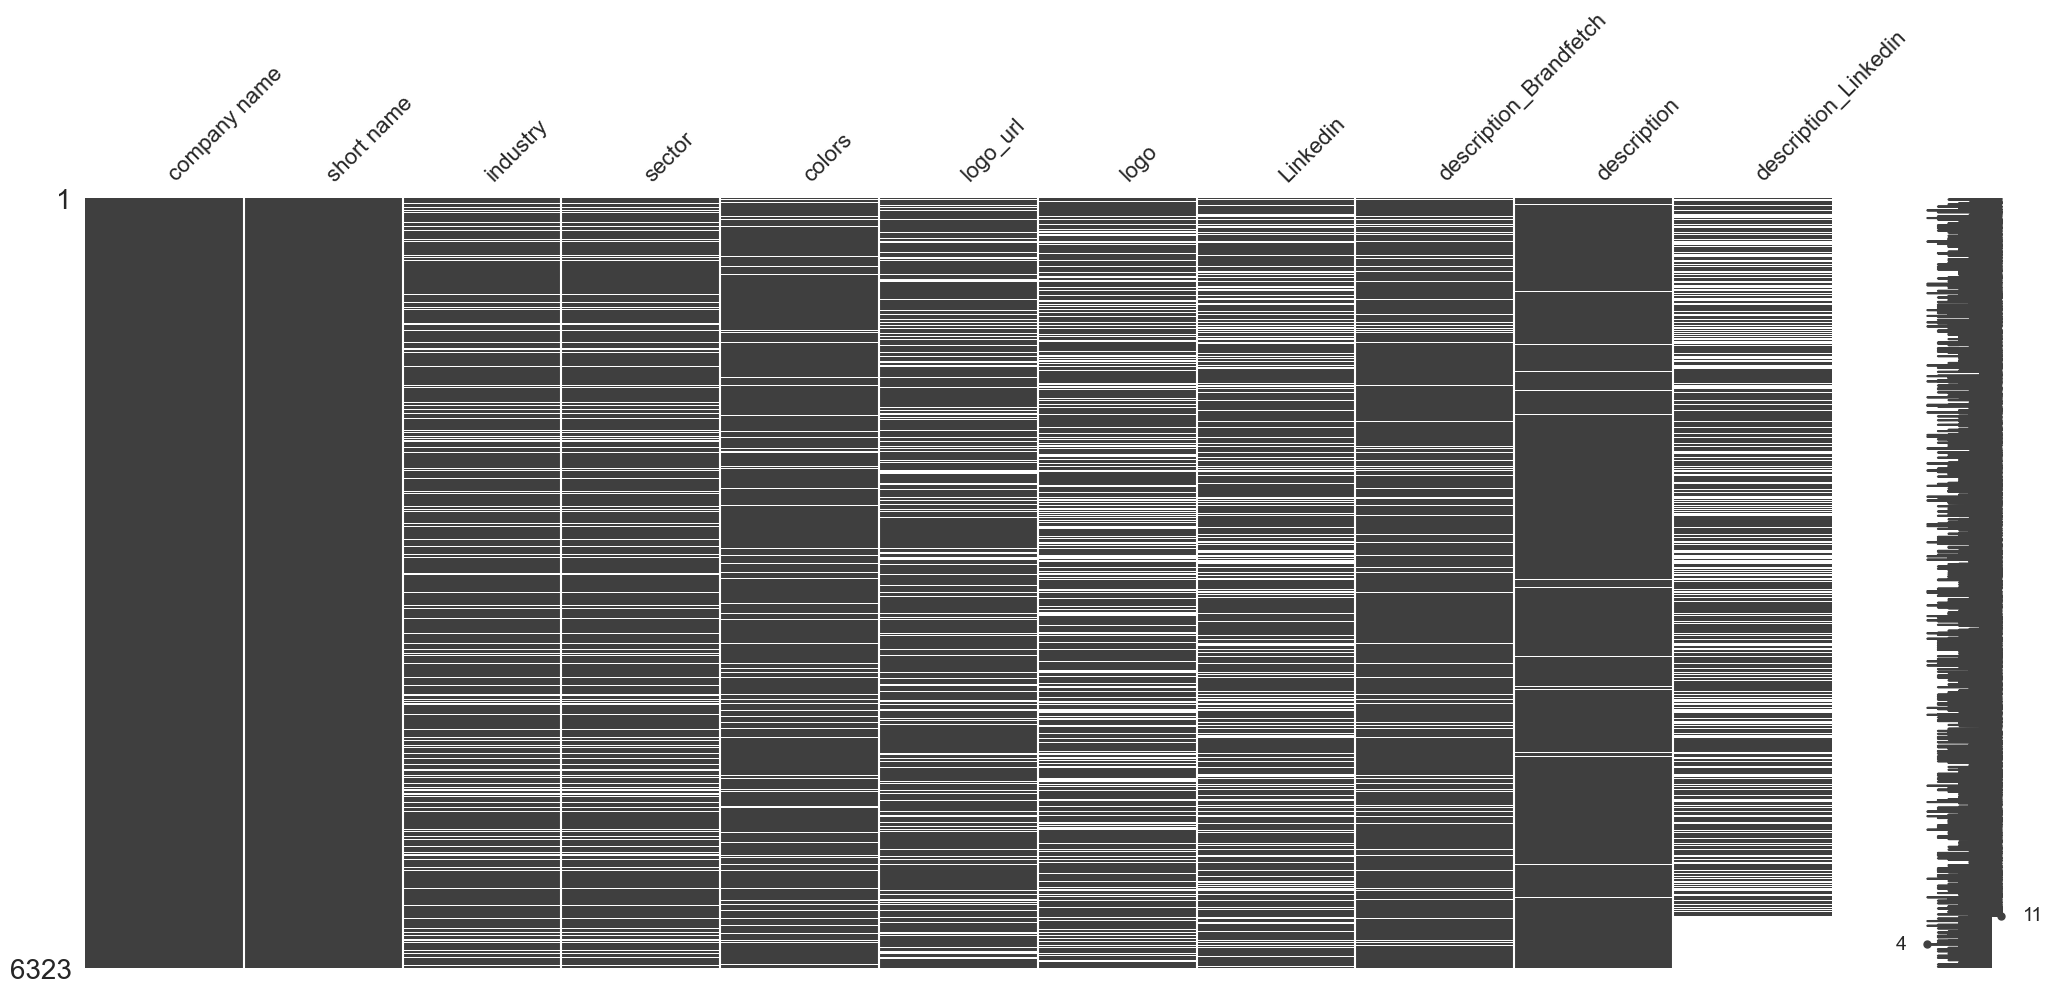

In [178]:
msno.matrix(df_finalCompanies)

In [179]:

df_finalCompanies["Final Description"] =  df_finalCompanies['description'].astype(str) + ', ' + df_finalCompanies['description_Brandfetch'].astype(str) + ', ' + df_finalCompanies['description_Linkedin'].astype(str)





C:\Users\Ammar Almasri\AppData\Local\Temp\ipykernel_18612\1603609504.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_finalCompanies["Final Description"] =  df_finalCompanies['description'].astype(str) + ', ' + df_finalCompanies['description_Brandfetch'].astype(str) + ', ' + df_finalCompanies['description_Linkedin'].astype(str)


In [180]:
df_finalCompanies=df_finalCompanies.drop(columns=['Linkedin','logo_url','description_Brandfetch', 'description','description_Linkedin','logo'])

In [181]:

df_finalCompanies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6323 entries, 0 to 6322
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   company name       6323 non-null   object
 1   short name         6323 non-null   object
 2   industry           5406 non-null   object
 3   sector             5406 non-null   object
 4   colors             5743 non-null   object
 5   Final Description  6323 non-null   object
dtypes: object(6)
memory usage: 345.8+ KB


<AxesSubplot: >

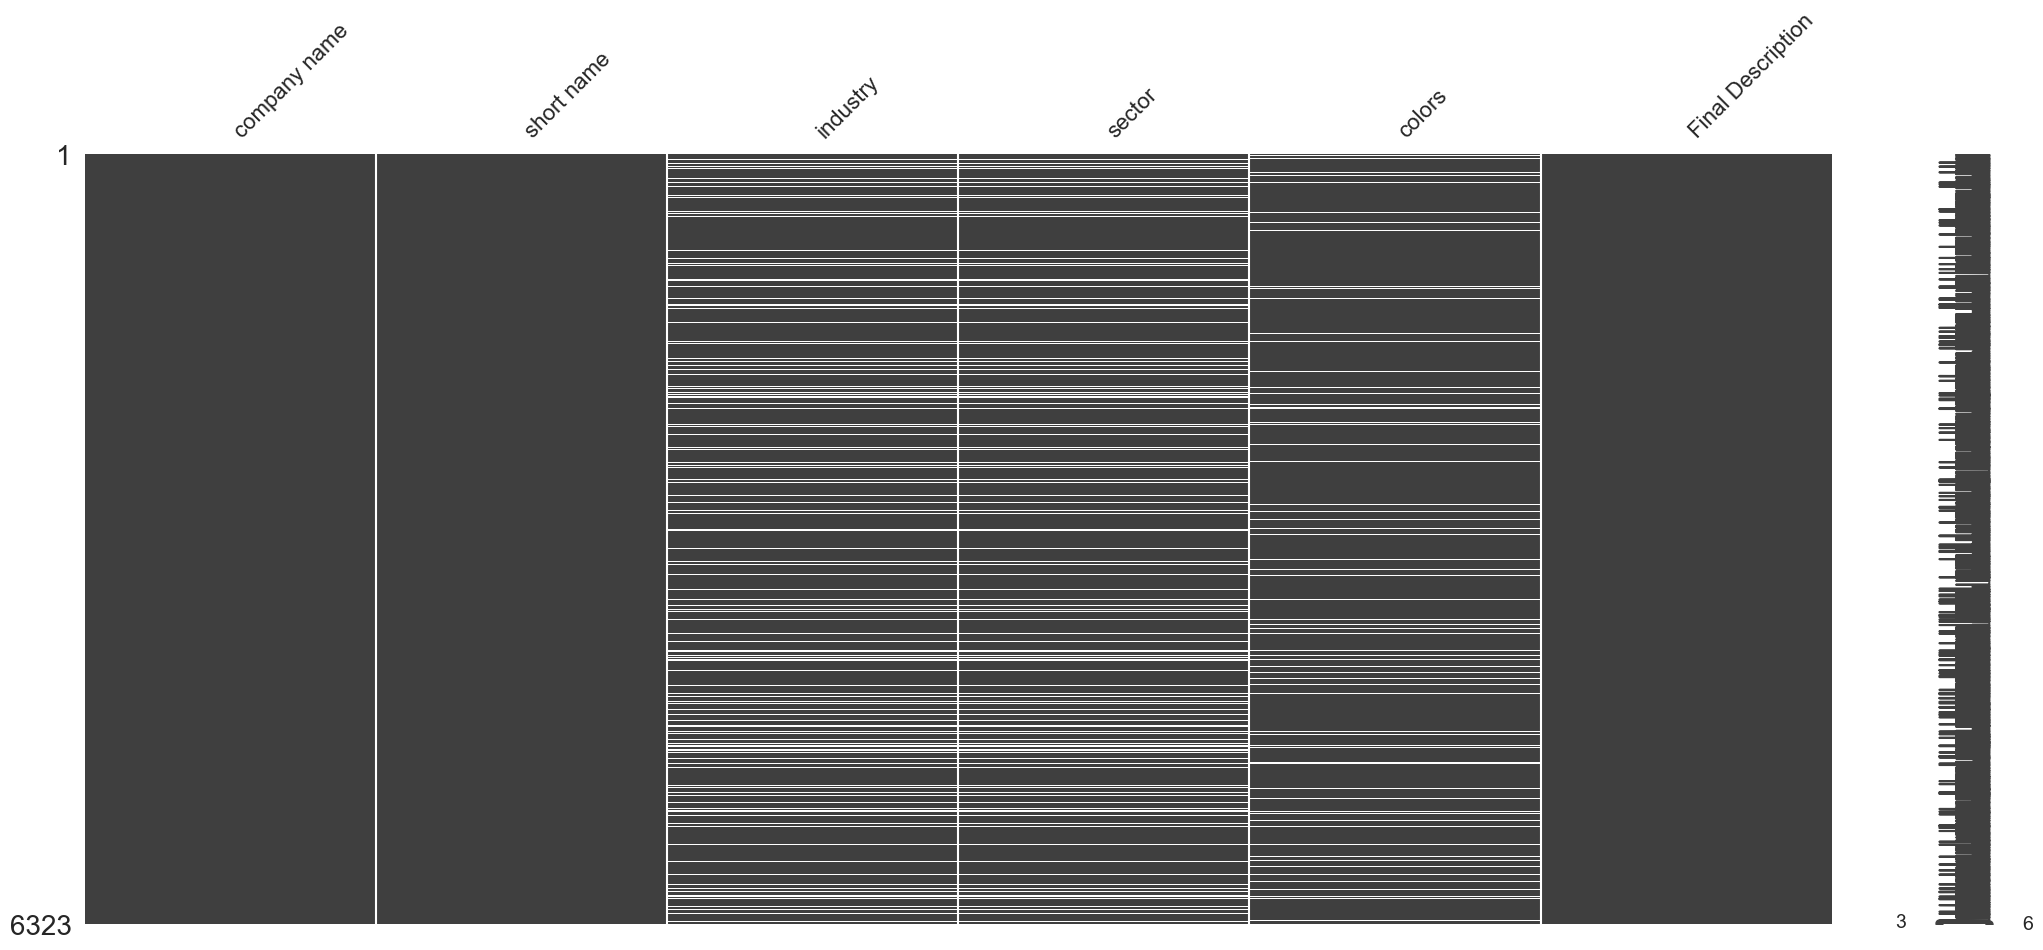

In [182]:

msno.matrix(df_finalCompanies)

In [183]:
df_finalCompanies=df_finalCompanies.dropna()
df_finalCompanies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4989 entries, 2 to 6322
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   company name       4989 non-null   object
 1   short name         4989 non-null   object
 2   industry           4989 non-null   object
 3   sector             4989 non-null   object
 4   colors             4989 non-null   object
 5   Final Description  4989 non-null   object
dtypes: object(6)
memory usage: 272.8+ KB


<AxesSubplot: >

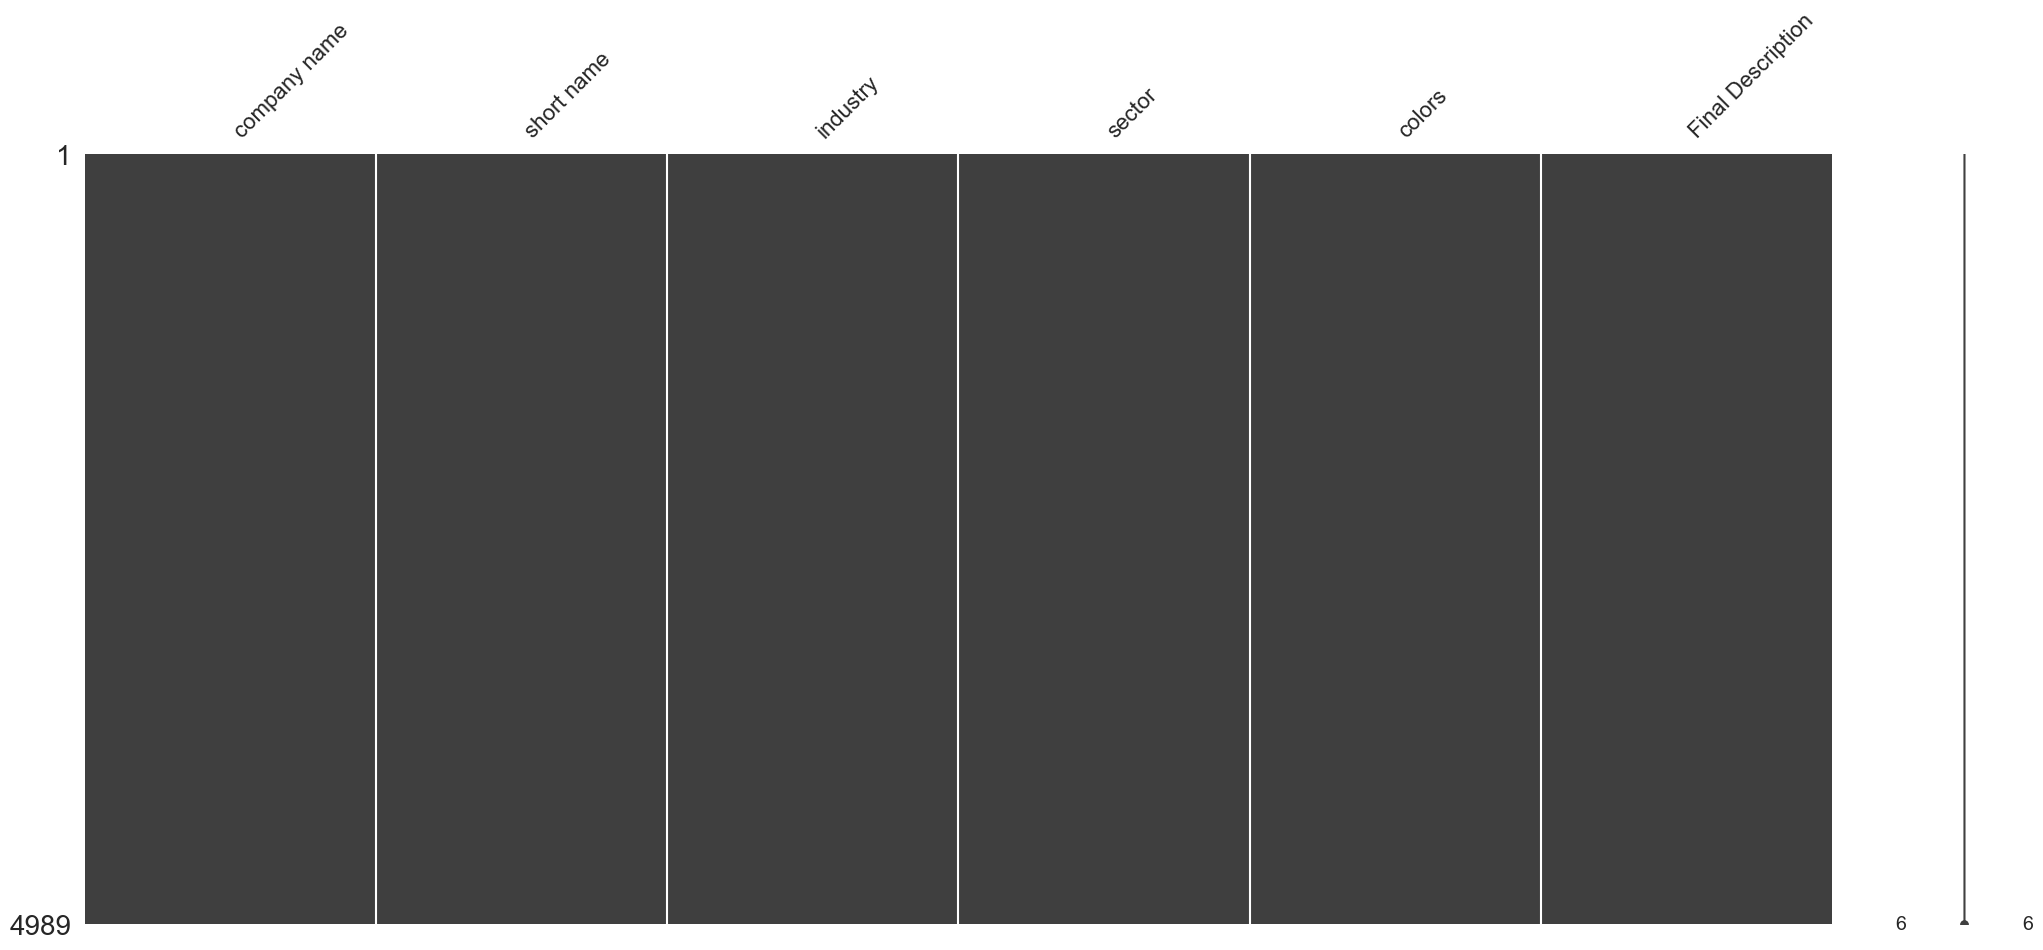

In [184]:
msno.matrix(df_finalCompanies)

In [185]:
text= list(df_finalCompanies['Final Description'])
text[0]

"Bank of the Ozarks Inc operates in the financial domain of the United States. Its main occupation is that of banking operations, through which it renders real estate loans., Welcome to Bank OZK, formerly Bank of the Ozarks, providing banking services for over 115-years. Please visit to learn more about checking & savings, wealth management and other services for individuals & businesses., We’re Bank OZK, connecting the great service you expect alongside the convenience, simplicity and security that only the best in banking allows.\n \nWith a strong commitment to the communities we serve, we are cultivating relationships that grow and thrive together.\n \nSince 1903, we've been the kind of bank where people like to do business and where people like to work; we’ve been named a top performing bank 12 times in the past eight years, all due to our commitment to putting our customers first alongside excellent financial performance.\n\nHere Today. Here Tomorrow. Here For You!"

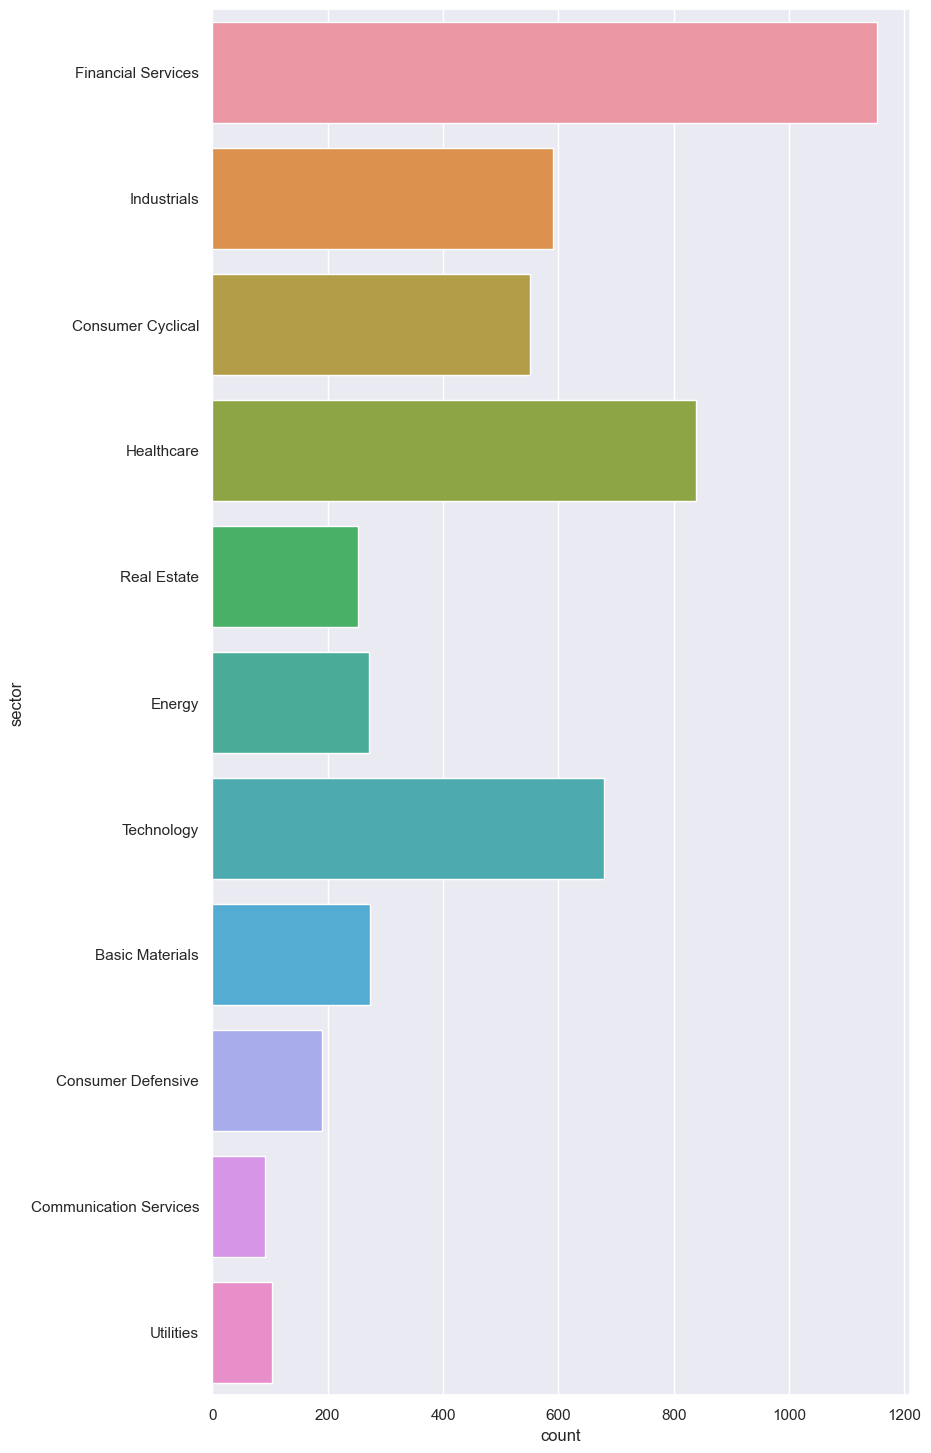

In [186]:
sns.countplot(y='sector', data = df_finalCompanies,)
sns.set(rc={'figure.figsize':(7,7)})

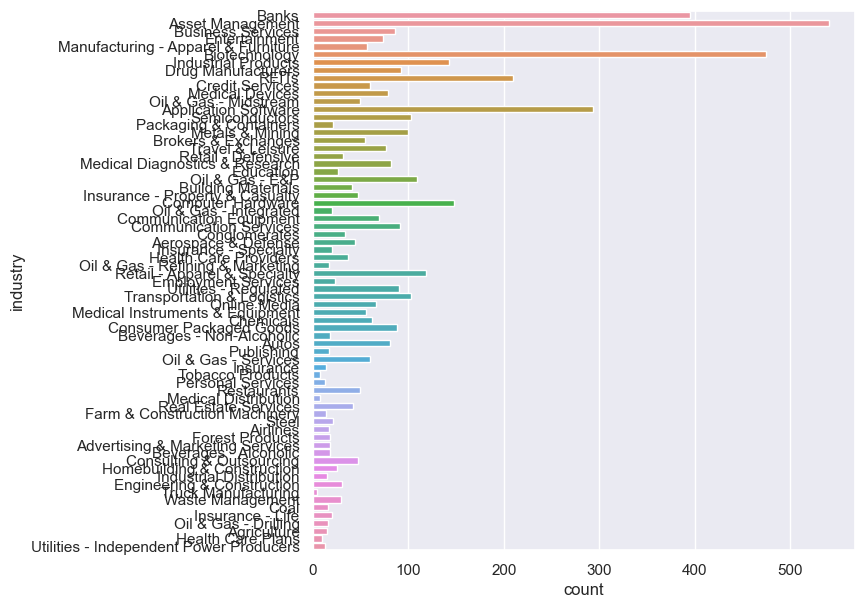

In [187]:
sns.countplot(y='industry', data = df_finalCompanies,)
sns.set(rc={'figure.figsize':(9,18)})

In [188]:
# Defining dictionary containing all emojis with their meanings.
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad',
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed',
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink',
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

## Defining set containing all stopwords in english.
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']


In [189]:
test =df_finalCompanies.iloc[2]

In [190]:
df_finalCompanies

,company name,short name,industry,sector,colors,Final Description
2,Bank OZK,Bank OZK,Banks,Financial Services,"#414141,#ffffff,#e40046",Bank of the Ozarks Inc operates in the financi...
3,Victory Capital Holdings Inc.,Victory Capital,Asset Management,Financial Services,"#116699,#ffffff,#5c89b4",Victory Capital Holdings Inc is an investment ...
4,Iron Mountain Incorporated (Delaware)Common St...,Iron Mountain Incorporated (Delaware)Common St...,Business Services,Industrials,#00548f,"Iron Mountain Inc provides records, informatio..."
5,Western New England Bancorp Inc.,Western New England Bancorp,Banks,Financial Services,"#00565d,#f7ecb5,#e44b26",Western New England Bancorp Inc through its su...
6,Dolby Laboratories,Dolby Laboratories,Entertainment,Consumer Cyclical,"#3E44FE,#FFFFFF,#252319",Dolby Laboratories Inc is an audio and imaging...
...,...,...,...,...,...,...
6318,Geospace Technologies Corporation,Geospace,Oil & Gas - Services,Energy,"#003172,#3499cd,#787979",Geospace Technologies Corp is engaged in desig...
6319,Fly Leasing Limited,Fly Leasing Limited,Consulting & Outsourcing,Industrials,"#363636,#ffffff,#74990b",Fly Leasing Ltd is principally engaged in purc...
6320,Liberty All-Star Equity Fund,Liberty All-Star Equity Fund,Asset Management,Financial Services,"#1b242b,#ffffff,#395d77",Liberty All Star Equity Fund is a closed end f...
6321,Viad Corp,Viad,Business Services,Industrials,"#070512,#ca3dfe,#056db7",Viad Corp is a United States based marketing c...


In [191]:
for index, row in df_finalCompanies['Final Description'].iteritems():
    lang = detect(row) #detecting each row
    df_finalCompanies.loc[index, 'language'] = lang

C:\Users\Ammar Almasri\AppData\Local\Temp\ipykernel_18612\1968125808.py:1: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, row in df_finalCompanies['Final Description'].iteritems():


In [192]:
df_finalCompanies['num_words'] = df_finalCompanies['Final Description'].apply(lambda x:len(x.split()))
df_finalCompanies

,company name,short name,industry,sector,colors,Final Description,language,num_words
2,Bank OZK,Bank OZK,Banks,Financial Services,"#414141,#ffffff,#e40046",Bank of the Ozarks Inc operates in the financi...,en,157
3,Victory Capital Holdings Inc.,Victory Capital,Asset Management,Financial Services,"#116699,#ffffff,#5c89b4",Victory Capital Holdings Inc is an investment ...,en,225
4,Iron Mountain Incorporated (Delaware)Common St...,Iron Mountain Incorporated (Delaware)Common St...,Business Services,Industrials,#00548f,"Iron Mountain Inc provides records, informatio...",en,138
5,Western New England Bancorp Inc.,Western New England Bancorp,Banks,Financial Services,"#00565d,#f7ecb5,#e44b26",Western New England Bancorp Inc through its su...,en,163
6,Dolby Laboratories,Dolby Laboratories,Entertainment,Consumer Cyclical,"#3E44FE,#FFFFFF,#252319",Dolby Laboratories Inc is an audio and imaging...,en,273
...,...,...,...,...,...,...,...,...
6318,Geospace Technologies Corporation,Geospace,Oil & Gas - Services,Energy,"#003172,#3499cd,#787979",Geospace Technologies Corp is engaged in desig...,en,50
6319,Fly Leasing Limited,Fly Leasing Limited,Consulting & Outsourcing,Industrials,"#363636,#ffffff,#74990b",Fly Leasing Ltd is principally engaged in purc...,en,37
6320,Liberty All-Star Equity Fund,Liberty All-Star Equity Fund,Asset Management,Financial Services,"#1b242b,#ffffff,#395d77",Liberty All Star Equity Fund is a closed end f...,en,37
6321,Viad Corp,Viad,Business Services,Industrials,"#070512,#ca3dfe,#056db7",Viad Corp is a United States based marketing c...,en,42


In [193]:

def text_preprocessing(df,col_name):
    column = col_name
    df[column] = df[column].progress_apply(lambda x:str(x).lower())
    df[column] = df[column].progress_apply(lambda x: th.cont_exp(x)) #you're -> you are; i'm -> i am
    df[column] = df[column].progress_apply(lambda x: th.remove_emails(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_special_chars(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_accented_chars(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_urls(x))

    return(df)

In [194]:
df_cleaned = text_preprocessing(df_finalCompanies,'Final Description')

  0%|          | 0/4989 [00:00<?, ?it/s]

  0%|          | 0/4989 [00:00<?, ?it/s]

  0%|          | 0/4989 [00:00<?, ?it/s]

  0%|          | 0/4989 [00:00<?, ?it/s]

  0%|          | 0/4989 [00:00<?, ?it/s]

  0%|          | 0/4989 [00:00<?, ?it/s]

In [195]:
text2= list(df_cleaned['Final Description'])
text2[0]

'bank of the ozarks inc operates in the financial domain of the united states its main occupation is that of banking operations through which it renders real estate loans welcome to bank ozk formerly bank of the ozarks providing banking services for over 115years please visit to learn more about checking savings wealth management and other services for individuals businesses were bank ozk connecting the great service you expect alongside the convenience simplicity and security that only the best in banking allows with a strong commitment to the communities we serve we are cultivating relationships that grow and thrive together since 1903 weve been the kind of bank where people like to do business and where people like to work weve been named a top performing bank 12 times in the past eight years all due to our commitment to putting our customers first alongside excellent financial performancehere today here tomorrow here for you'

In [196]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4989 entries, 2 to 6322
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   company name       4989 non-null   object
 1   short name         4989 non-null   object
 2   industry           4989 non-null   object
 3   sector             4989 non-null   object
 4   colors             4989 non-null   object
 5   Final Description  4989 non-null   object
 6   language           4989 non-null   object
 7   num_words          4989 non-null   int64 
dtypes: int64(1), object(7)
memory usage: 479.8+ KB


In [197]:
df_cleaned['Cleand_Final Description'] = df_cleaned['Final Description'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwordlist)]))

In [198]:
df_cleaned['num_words_afterCleaning'] = df_cleaned['Cleand_Final Description'].apply(lambda x:len(x.split()))
df_cleaned

,company name,short name,industry,sector,colors,Final Description,language,num_words,Cleand_Final Description,num_words_afterCleaning
2,Bank OZK,Bank OZK,Banks,Financial Services,"#414141,#ffffff,#e40046",bank of the ozarks inc operates in the financi...,en,157,bank ozarks inc operates financial domain unit...,91
3,Victory Capital Holdings Inc.,Victory Capital,Asset Management,Financial Services,"#116699,#ffffff,#5c89b4",victory capital holdings inc is an investment ...,en,225,victory capital holdings inc investment manage...,162
4,Iron Mountain Incorporated (Delaware)Common St...,Iron Mountain Incorporated (Delaware)Common St...,Business Services,Industrials,#00548f,iron mountain inc provides records information...,en,138,iron mountain inc provides records information...,102
5,Western New England Bancorp Inc.,Western New England Bancorp,Banks,Financial Services,"#00565d,#f7ecb5,#e44b26",western new england bancorp inc through its su...,en,163,western new england bancorp inc subsidiaries p...,104
6,Dolby Laboratories,Dolby Laboratories,Entertainment,Consumer Cyclical,"#3E44FE,#FFFFFF,#252319",dolby laboratories inc is an audio and imaging...,en,273,dolby laboratories inc audio imaging technolog...,163
...,...,...,...,...,...,...,...,...,...,...
6318,Geospace Technologies Corporation,Geospace,Oil & Gas - Services,Energy,"#003172,#3499cd,#787979",geospace technologies corp is engaged in desig...,en,50,geospace technologies corp engaged designing m...,33
6319,Fly Leasing Limited,Fly Leasing Limited,Consulting & Outsourcing,Industrials,"#363636,#ffffff,#74990b",fly leasing limited is principally engaged in ...,en,37,fly leasing limited principally engaged purcha...,26
6320,Liberty All-Star Equity Fund,Liberty All-Star Equity Fund,Asset Management,Financial Services,"#1b242b,#ffffff,#395d77",liberty all star equity fund is a closed end f...,en,37,liberty star equity fund closed end fund objec...,25
6321,Viad Corp,Viad,Business Services,Industrials,"#070512,#ca3dfe,#056db7",viad corp is a united states based marketing c...,en,42,viad corp united states based marketing compan...,32


In [199]:

nltk.download('wordnet')
nltk.download('omw-1.4')

df_cleaned['Cleand_Final Description'] = df_cleaned['Cleand_Final Description'].apply(lambda x: "".join([Word(word).lemmatize() for word in x]))
df_cleaned

[nltk_data] Downloading package wordnet to C:\Users\Ammar
[nltk_data]     Almasri\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Ammar
[nltk_data]     Almasri\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,company name,short name,industry,sector,colors,Final Description,language,num_words,Cleand_Final Description,num_words_afterCleaning
2,Bank OZK,Bank OZK,Banks,Financial Services,"#414141,#ffffff,#e40046",bank of the ozarks inc operates in the financi...,en,157,bank ozarks inc operates financial domain unit...,91
3,Victory Capital Holdings Inc.,Victory Capital,Asset Management,Financial Services,"#116699,#ffffff,#5c89b4",victory capital holdings inc is an investment ...,en,225,victory capital holdings inc investment manage...,162
4,Iron Mountain Incorporated (Delaware)Common St...,Iron Mountain Incorporated (Delaware)Common St...,Business Services,Industrials,#00548f,iron mountain inc provides records information...,en,138,iron mountain inc provides records information...,102
5,Western New England Bancorp Inc.,Western New England Bancorp,Banks,Financial Services,"#00565d,#f7ecb5,#e44b26",western new england bancorp inc through its su...,en,163,western new england bancorp inc subsidiaries p...,104
6,Dolby Laboratories,Dolby Laboratories,Entertainment,Consumer Cyclical,"#3E44FE,#FFFFFF,#252319",dolby laboratories inc is an audio and imaging...,en,273,dolby laboratories inc audio imaging technolog...,163
...,...,...,...,...,...,...,...,...,...,...
6318,Geospace Technologies Corporation,Geospace,Oil & Gas - Services,Energy,"#003172,#3499cd,#787979",geospace technologies corp is engaged in desig...,en,50,geospace technologies corp engaged designing m...,33
6319,Fly Leasing Limited,Fly Leasing Limited,Consulting & Outsourcing,Industrials,"#363636,#ffffff,#74990b",fly leasing limited is principally engaged in ...,en,37,fly leasing limited principally engaged purcha...,26
6320,Liberty All-Star Equity Fund,Liberty All-Star Equity Fund,Asset Management,Financial Services,"#1b242b,#ffffff,#395d77",liberty all star equity fund is a closed end f...,en,37,liberty star equity fund closed end fund objec...,25
6321,Viad Corp,Viad,Business Services,Industrials,"#070512,#ca3dfe,#056db7",viad corp is a united states based marketing c...,en,42,viad corp united states based marketing compan...,32


In [200]:
def test (word):
 st= WordNetLemmatizer().lemmatize(word,'v')
 return st



In [201]:
from nltk.stem import PorterStemmer

st = WordNetLemmatizer()
df_cleaned['Cleand_Final Description']=df_cleaned['Cleand_Final Description'].apply(lambda x: " ".join([st.lemmatize(word,'v') for word in x.split()]))

In [202]:
df_cleaned

,company name,short name,industry,sector,colors,Final Description,language,num_words,Cleand_Final Description,num_words_afterCleaning
2,Bank OZK,Bank OZK,Banks,Financial Services,"#414141,#ffffff,#e40046",bank of the ozarks inc operates in the financi...,en,157,bank ozarks inc operate financial domain unite...,91
3,Victory Capital Holdings Inc.,Victory Capital,Asset Management,Financial Services,"#116699,#ffffff,#5c89b4",victory capital holdings inc is an investment ...,en,225,victory capital hold inc investment management...,162
4,Iron Mountain Incorporated (Delaware)Common St...,Iron Mountain Incorporated (Delaware)Common St...,Business Services,Industrials,#00548f,iron mountain inc provides records information...,en,138,iron mountain inc provide record information m...,102
5,Western New England Bancorp Inc.,Western New England Bancorp,Banks,Financial Services,"#00565d,#f7ecb5,#e44b26",western new england bancorp inc through its su...,en,163,western new england bancorp inc subsidiaries p...,104
6,Dolby Laboratories,Dolby Laboratories,Entertainment,Consumer Cyclical,"#3E44FE,#FFFFFF,#252319",dolby laboratories inc is an audio and imaging...,en,273,dolby laboratories inc audio image technologie...,163
...,...,...,...,...,...,...,...,...,...,...
6318,Geospace Technologies Corporation,Geospace,Oil & Gas - Services,Energy,"#003172,#3499cd,#787979",geospace technologies corp is engaged in desig...,en,50,geospace technologies corp engage design manuf...,33
6319,Fly Leasing Limited,Fly Leasing Limited,Consulting & Outsourcing,Industrials,"#363636,#ffffff,#74990b",fly leasing limited is principally engaged in ...,en,37,fly lease limit principally engage purchase co...,26
6320,Liberty All-Star Equity Fund,Liberty All-Star Equity Fund,Asset Management,Financial Services,"#1b242b,#ffffff,#395d77",liberty all star equity fund is a closed end f...,en,37,liberty star equity fund close end fund object...,25
6321,Viad Corp,Viad,Business Services,Industrials,"#070512,#ca3dfe,#056db7",viad corp is a united states based marketing c...,en,42,viad corp unite state base market company comp...,32


In [203]:

Geometric= pd.read_csv("Geometric Patterns-Grid view.csv")
Geometric= Geometric['Word'].to_numpy()

df_cleaned['Geometric Shapes'] = df_cleaned['Cleand_Final Description'].apply(lambda x: ' '.join([word for word in x.split() if word  in (Geometric)]))
df_cleaned['Geometric Shapes'] = df_cleaned['Geometric Shapes'].apply(lambda x:len(x.split()))
df_cleaned

,company name,short name,industry,sector,colors,Final Description,language,num_words,Cleand_Final Description,num_words_afterCleaning,Geometric Shapes
2,Bank OZK,Bank OZK,Banks,Financial Services,"#414141,#ffffff,#e40046",bank of the ozarks inc operates in the financi...,en,157,bank ozarks inc operate financial domain unite...,91,0
3,Victory Capital Holdings Inc.,Victory Capital,Asset Management,Financial Services,"#116699,#ffffff,#5c89b4",victory capital holdings inc is an investment ...,en,225,victory capital hold inc investment management...,162,1
4,Iron Mountain Incorporated (Delaware)Common St...,Iron Mountain Incorporated (Delaware)Common St...,Business Services,Industrials,#00548f,iron mountain inc provides records information...,en,138,iron mountain inc provide record information m...,102,2
5,Western New England Bancorp Inc.,Western New England Bancorp,Banks,Financial Services,"#00565d,#f7ecb5,#e44b26",western new england bancorp inc through its su...,en,163,western new england bancorp inc subsidiaries p...,104,3
6,Dolby Laboratories,Dolby Laboratories,Entertainment,Consumer Cyclical,"#3E44FE,#FFFFFF,#252319",dolby laboratories inc is an audio and imaging...,en,273,dolby laboratories inc audio image technologie...,163,4
...,...,...,...,...,...,...,...,...,...,...,...
6318,Geospace Technologies Corporation,Geospace,Oil & Gas - Services,Energy,"#003172,#3499cd,#787979",geospace technologies corp is engaged in desig...,en,50,geospace technologies corp engage design manuf...,33,1
6319,Fly Leasing Limited,Fly Leasing Limited,Consulting & Outsourcing,Industrials,"#363636,#ffffff,#74990b",fly leasing limited is principally engaged in ...,en,37,fly lease limit principally engage purchase co...,26,1
6320,Liberty All-Star Equity Fund,Liberty All-Star Equity Fund,Asset Management,Financial Services,"#1b242b,#ffffff,#395d77",liberty all star equity fund is a closed end f...,en,37,liberty star equity fund close end fund object...,25,1
6321,Viad Corp,Viad,Business Services,Industrials,"#070512,#ca3dfe,#056db7",viad corp is a united states based marketing c...,en,42,viad corp unite state base market company comp...,32,1


In [204]:

Floral= pd.read_csv("Floral Patterns-Grid view.csv")
Floral= Floral['Word'].to_numpy()

df_cleaned['Floral Shapes'] = df_cleaned['Cleand_Final Description'].apply(lambda x: ' '.join([word for word in x.split() if word  in (Floral)]))
df_cleaned['Floral Shapes'] = df_cleaned['Floral Shapes'].apply(lambda x:len(x.split()))

df_cleaned


,company name,short name,industry,sector,colors,Final Description,language,num_words,Cleand_Final Description,num_words_afterCleaning,Geometric Shapes,Floral Shapes
2,Bank OZK,Bank OZK,Banks,Financial Services,"#414141,#ffffff,#e40046",bank of the ozarks inc operates in the financi...,en,157,bank ozarks inc operate financial domain unite...,91,0,1
3,Victory Capital Holdings Inc.,Victory Capital,Asset Management,Financial Services,"#116699,#ffffff,#5c89b4",victory capital holdings inc is an investment ...,en,225,victory capital hold inc investment management...,162,1,0
4,Iron Mountain Incorporated (Delaware)Common St...,Iron Mountain Incorporated (Delaware)Common St...,Business Services,Industrials,#00548f,iron mountain inc provides records information...,en,138,iron mountain inc provide record information m...,102,2,0
5,Western New England Bancorp Inc.,Western New England Bancorp,Banks,Financial Services,"#00565d,#f7ecb5,#e44b26",western new england bancorp inc through its su...,en,163,western new england bancorp inc subsidiaries p...,104,3,2
6,Dolby Laboratories,Dolby Laboratories,Entertainment,Consumer Cyclical,"#3E44FE,#FFFFFF,#252319",dolby laboratories inc is an audio and imaging...,en,273,dolby laboratories inc audio image technologie...,163,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...
6318,Geospace Technologies Corporation,Geospace,Oil & Gas - Services,Energy,"#003172,#3499cd,#787979",geospace technologies corp is engaged in desig...,en,50,geospace technologies corp engage design manuf...,33,1,2
6319,Fly Leasing Limited,Fly Leasing Limited,Consulting & Outsourcing,Industrials,"#363636,#ffffff,#74990b",fly leasing limited is principally engaged in ...,en,37,fly lease limit principally engage purchase co...,26,1,1
6320,Liberty All-Star Equity Fund,Liberty All-Star Equity Fund,Asset Management,Financial Services,"#1b242b,#ffffff,#395d77",liberty all star equity fund is a closed end f...,en,37,liberty star equity fund close end fund object...,25,1,1
6321,Viad Corp,Viad,Business Services,Industrials,"#070512,#ca3dfe,#056db7",viad corp is a united states based marketing c...,en,42,viad corp unite state base market company comp...,32,1,0


In [205]:

Summer= pd.read_csv("Summer patterns-Grid view.csv")
Summer= Summer['Word'].to_numpy()

df_cleaned['Summer Shapes'] = df_cleaned['Cleand_Final Description'].apply(lambda x: ' '.join([word for word in x.split() if word  in (Summer)]))
df_cleaned['Summer Shapes'] = df_cleaned['Summer Shapes'].apply(lambda x:len(x.split()))

df_cleaned


,company name,short name,industry,sector,colors,Final Description,language,num_words,Cleand_Final Description,num_words_afterCleaning,Geometric Shapes,Floral Shapes,Summer Shapes
2,Bank OZK,Bank OZK,Banks,Financial Services,"#414141,#ffffff,#e40046",bank of the ozarks inc operates in the financi...,en,157,bank ozarks inc operate financial domain unite...,91,0,1,6
3,Victory Capital Holdings Inc.,Victory Capital,Asset Management,Financial Services,"#116699,#ffffff,#5c89b4",victory capital holdings inc is an investment ...,en,225,victory capital hold inc investment management...,162,1,0,2
4,Iron Mountain Incorporated (Delaware)Common St...,Iron Mountain Incorporated (Delaware)Common St...,Business Services,Industrials,#00548f,iron mountain inc provides records information...,en,138,iron mountain inc provide record information m...,102,2,0,2
5,Western New England Bancorp Inc.,Western New England Bancorp,Banks,Financial Services,"#00565d,#f7ecb5,#e44b26",western new england bancorp inc through its su...,en,163,western new england bancorp inc subsidiaries p...,104,3,2,3
6,Dolby Laboratories,Dolby Laboratories,Entertainment,Consumer Cyclical,"#3E44FE,#FFFFFF,#252319",dolby laboratories inc is an audio and imaging...,en,273,dolby laboratories inc audio image technologie...,163,4,2,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6318,Geospace Technologies Corporation,Geospace,Oil & Gas - Services,Energy,"#003172,#3499cd,#787979",geospace technologies corp is engaged in desig...,en,50,geospace technologies corp engage design manuf...,33,1,2,0
6319,Fly Leasing Limited,Fly Leasing Limited,Consulting & Outsourcing,Industrials,"#363636,#ffffff,#74990b",fly leasing limited is principally engaged in ...,en,37,fly lease limit principally engage purchase co...,26,1,1,0
6320,Liberty All-Star Equity Fund,Liberty All-Star Equity Fund,Asset Management,Financial Services,"#1b242b,#ffffff,#395d77",liberty all star equity fund is a closed end f...,en,37,liberty star equity fund close end fund object...,25,1,1,1
6321,Viad Corp,Viad,Business Services,Industrials,"#070512,#ca3dfe,#056db7",viad corp is a united states based marketing c...,en,42,viad corp unite state base market company comp...,32,1,0,3


In [206]:
Tribal= pd.read_csv("Tribal Patterns-Grid view.csv")
Tribal= Tribal['Word'].to_numpy()

df_cleaned['Tribal Shapes'] = df_cleaned['Cleand_Final Description'].apply(lambda x: ' '.join([word for word in x.split() if word  in (Tribal)]))
df_cleaned['Tribal Shapes'] = df_cleaned['Tribal Shapes'].apply(lambda x:len(x.split()))
df_cleaned

,company name,short name,industry,sector,colors,Final Description,language,num_words,Cleand_Final Description,num_words_afterCleaning,Geometric Shapes,Floral Shapes,Summer Shapes,Tribal Shapes
2,Bank OZK,Bank OZK,Banks,Financial Services,"#414141,#ffffff,#e40046",bank of the ozarks inc operates in the financi...,en,157,bank ozarks inc operate financial domain unite...,91,0,1,6,4
3,Victory Capital Holdings Inc.,Victory Capital,Asset Management,Financial Services,"#116699,#ffffff,#5c89b4",victory capital holdings inc is an investment ...,en,225,victory capital hold inc investment management...,162,1,0,2,2
4,Iron Mountain Incorporated (Delaware)Common St...,Iron Mountain Incorporated (Delaware)Common St...,Business Services,Industrials,#00548f,iron mountain inc provides records information...,en,138,iron mountain inc provide record information m...,102,2,0,2,1
5,Western New England Bancorp Inc.,Western New England Bancorp,Banks,Financial Services,"#00565d,#f7ecb5,#e44b26",western new england bancorp inc through its su...,en,163,western new england bancorp inc subsidiaries p...,104,3,2,3,7
6,Dolby Laboratories,Dolby Laboratories,Entertainment,Consumer Cyclical,"#3E44FE,#FFFFFF,#252319",dolby laboratories inc is an audio and imaging...,en,273,dolby laboratories inc audio image technologie...,163,4,2,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6318,Geospace Technologies Corporation,Geospace,Oil & Gas - Services,Energy,"#003172,#3499cd,#787979",geospace technologies corp is engaged in desig...,en,50,geospace technologies corp engage design manuf...,33,1,2,0,1
6319,Fly Leasing Limited,Fly Leasing Limited,Consulting & Outsourcing,Industrials,"#363636,#ffffff,#74990b",fly leasing limited is principally engaged in ...,en,37,fly lease limit principally engage purchase co...,26,1,1,0,1
6320,Liberty All-Star Equity Fund,Liberty All-Star Equity Fund,Asset Management,Financial Services,"#1b242b,#ffffff,#395d77",liberty all star equity fund is a closed end f...,en,37,liberty star equity fund close end fund object...,25,1,1,1,1
6321,Viad Corp,Viad,Business Services,Industrials,"#070512,#ca3dfe,#056db7",viad corp is a united states based marketing c...,en,42,viad corp unite state base market company comp...,32,1,0,3,1


In [207]:
df_cleaned = df_cleaned[df_cleaned['language'] == 'en']


In [208]:
df_cleaned

,company name,short name,industry,sector,colors,Final Description,language,num_words,Cleand_Final Description,num_words_afterCleaning,Geometric Shapes,Floral Shapes,Summer Shapes,Tribal Shapes
2,Bank OZK,Bank OZK,Banks,Financial Services,"#414141,#ffffff,#e40046",bank of the ozarks inc operates in the financi...,en,157,bank ozarks inc operate financial domain unite...,91,0,1,6,4
3,Victory Capital Holdings Inc.,Victory Capital,Asset Management,Financial Services,"#116699,#ffffff,#5c89b4",victory capital holdings inc is an investment ...,en,225,victory capital hold inc investment management...,162,1,0,2,2
4,Iron Mountain Incorporated (Delaware)Common St...,Iron Mountain Incorporated (Delaware)Common St...,Business Services,Industrials,#00548f,iron mountain inc provides records information...,en,138,iron mountain inc provide record information m...,102,2,0,2,1
5,Western New England Bancorp Inc.,Western New England Bancorp,Banks,Financial Services,"#00565d,#f7ecb5,#e44b26",western new england bancorp inc through its su...,en,163,western new england bancorp inc subsidiaries p...,104,3,2,3,7
6,Dolby Laboratories,Dolby Laboratories,Entertainment,Consumer Cyclical,"#3E44FE,#FFFFFF,#252319",dolby laboratories inc is an audio and imaging...,en,273,dolby laboratories inc audio image technologie...,163,4,2,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6318,Geospace Technologies Corporation,Geospace,Oil & Gas - Services,Energy,"#003172,#3499cd,#787979",geospace technologies corp is engaged in desig...,en,50,geospace technologies corp engage design manuf...,33,1,2,0,1
6319,Fly Leasing Limited,Fly Leasing Limited,Consulting & Outsourcing,Industrials,"#363636,#ffffff,#74990b",fly leasing limited is principally engaged in ...,en,37,fly lease limit principally engage purchase co...,26,1,1,0,1
6320,Liberty All-Star Equity Fund,Liberty All-Star Equity Fund,Asset Management,Financial Services,"#1b242b,#ffffff,#395d77",liberty all star equity fund is a closed end f...,en,37,liberty star equity fund close end fund object...,25,1,1,1,1
6321,Viad Corp,Viad,Business Services,Industrials,"#070512,#ca3dfe,#056db7",viad corp is a united states based marketing c...,en,42,viad corp unite state base market company comp...,32,1,0,3,1


In [209]:
# sort the subset frame over axis 1, i.e., each row is independently sorted
cols_subset = ["Geometric Shapes", "Floral Shapes", "Summer Shapes", "Tribal Shapes"]
sorted_values = np.sort(df_cleaned[cols_subset], axis=1)
# extract information
df_cleaned["maximum"] = sorted_values[:, -1]  # since ascending sort, max is at the end
df_cleaned["minimum"] = sorted_values[:, 0]
df_cleaned["2nd largest"] = sorted_values[:, -2]
df_cleaned["3rd largest"] = sorted_values[:, -3]
df_cleaned

C:\Users\Ammar Almasri\AppData\Local\Temp\ipykernel_18612\1195157248.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["maximum"] = sorted_values[:, -1]  # since ascending sort, max is at the end
C:\Users\Ammar Almasri\AppData\Local\Temp\ipykernel_18612\1195157248.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["minimum"] = sorted_values[:, 0]
C:\Users\Ammar Almasri\AppData\Local\Temp\ipykernel_18612\1195157248.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy 

,company name,short name,industry,sector,colors,Final Description,language,num_words,Cleand_Final Description,num_words_afterCleaning,Geometric Shapes,Floral Shapes,Summer Shapes,Tribal Shapes,maximum,minimum,2nd largest,3rd largest
2,Bank OZK,Bank OZK,Banks,Financial Services,"#414141,#ffffff,#e40046",bank of the ozarks inc operates in the financi...,en,157,bank ozarks inc operate financial domain unite...,91,0,1,6,4,6,0,4,1
3,Victory Capital Holdings Inc.,Victory Capital,Asset Management,Financial Services,"#116699,#ffffff,#5c89b4",victory capital holdings inc is an investment ...,en,225,victory capital hold inc investment management...,162,1,0,2,2,2,0,2,1
4,Iron Mountain Incorporated (Delaware)Common St...,Iron Mountain Incorporated (Delaware)Common St...,Business Services,Industrials,#00548f,iron mountain inc provides records information...,en,138,iron mountain inc provide record information m...,102,2,0,2,1,2,0,2,1
5,Western New England Bancorp Inc.,Western New England Bancorp,Banks,Financial Services,"#00565d,#f7ecb5,#e44b26",western new england bancorp inc through its su...,en,163,western new england bancorp inc subsidiaries p...,104,3,2,3,7,7,2,3,3
6,Dolby Laboratories,Dolby Laboratories,Entertainment,Consumer Cyclical,"#3E44FE,#FFFFFF,#252319",dolby laboratories inc is an audio and imaging...,en,273,dolby laboratories inc audio image technologie...,163,4,2,12,2,12,2,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6318,Geospace Technologies Corporation,Geospace,Oil & Gas - Services,Energy,"#003172,#3499cd,#787979",geospace technologies corp is engaged in desig...,en,50,geospace technologies corp engage design manuf...,33,1,2,0,1,2,0,1,1
6319,Fly Leasing Limited,Fly Leasing Limited,Consulting & Outsourcing,Industrials,"#363636,#ffffff,#74990b",fly leasing limited is principally engaged in ...,en,37,fly lease limit principally engage purchase co...,26,1,1,0,1,1,0,1,1
6320,Liberty All-Star Equity Fund,Liberty All-Star Equity Fund,Asset Management,Financial Services,"#1b242b,#ffffff,#395d77",liberty all star equity fund is a closed end f...,en,37,liberty star equity fund close end fund object...,25,1,1,1,1,1,1,1,1
6321,Viad Corp,Viad,Business Services,Industrials,"#070512,#ca3dfe,#056db7",viad corp is a united states based marketing c...,en,42,viad corp unite state base market company comp...,32,1,0,3,1,3,0,1,1


In [210]:
df_cleaned= df_cleaned.loc[df_cleaned['maximum'] > df_cleaned['2nd largest']]

In [211]:
df_cleaned

,company name,short name,industry,sector,colors,Final Description,language,num_words,Cleand_Final Description,num_words_afterCleaning,Geometric Shapes,Floral Shapes,Summer Shapes,Tribal Shapes,maximum,minimum,2nd largest,3rd largest
2,Bank OZK,Bank OZK,Banks,Financial Services,"#414141,#ffffff,#e40046",bank of the ozarks inc operates in the financi...,en,157,bank ozarks inc operate financial domain unite...,91,0,1,6,4,6,0,4,1
5,Western New England Bancorp Inc.,Western New England Bancorp,Banks,Financial Services,"#00565d,#f7ecb5,#e44b26",western new england bancorp inc through its su...,en,163,western new england bancorp inc subsidiaries p...,104,3,2,3,7,7,2,3,3
6,Dolby Laboratories,Dolby Laboratories,Entertainment,Consumer Cyclical,"#3E44FE,#FFFFFF,#252319",dolby laboratories inc is an audio and imaging...,en,273,dolby laboratories inc audio image technologie...,163,4,2,12,2,12,2,4,2
7,Barclays PLC,Barclays PLC,Banks,Financial Services,"#060005,#f2fbfe,#5d5ae5",barclays plc is a financial services provider ...,en,53,barclays plc financial service provider engage...,35,0,0,0,2,2,0,0,0
8,First BanCorp.,First BanCorp.,Banks,Financial Services,"#482404,#ffffff,#00833c",first bancorp is a financial holding company i...,en,139,first bancorp financial hold company operate s...,93,0,1,6,4,6,0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6316,Eagle Capital Growth Fund Inc.,Eagle Capital Growth Fund,Asset Management,Financial Services,"#000000,#a5c6e7,#005bb7",eagle capital growth fund inc is a diversified...,en,13,eagle capital growth fund inc diversify closed...,11,1,0,0,0,1,0,0,0
6317,CVB Financial Corporation,CVB Financial,Banks,Financial Services,"#107AB7,#FFFFFF,#DCDBE2,#7A003B",cvb financial corp is a bank holding company f...,en,47,cvb financial corp bank hold company citizens ...,34,0,0,0,1,1,0,0,0
6318,Geospace Technologies Corporation,Geospace,Oil & Gas - Services,Energy,"#003172,#3499cd,#787979",geospace technologies corp is engaged in desig...,en,50,geospace technologies corp engage design manuf...,33,1,2,0,1,2,0,1,1
6321,Viad Corp,Viad,Business Services,Industrials,"#070512,#ca3dfe,#056db7",viad corp is a united states based marketing c...,en,42,viad corp unite state base market company comp...,32,1,0,3,1,3,0,1,1


In [212]:
df_cleaned.loc[df_cleaned['Geometric Shapes'] == df_cleaned['maximum'], 'Geometric Shapes'] = 1
df_cleaned.loc[df_cleaned['Geometric Shapes'] != 1, 'Geometric Shapes'] = 0


In [213]:
df_cleaned

,company name,short name,industry,sector,colors,Final Description,language,num_words,Cleand_Final Description,num_words_afterCleaning,Geometric Shapes,Floral Shapes,Summer Shapes,Tribal Shapes,maximum,minimum,2nd largest,3rd largest
2,Bank OZK,Bank OZK,Banks,Financial Services,"#414141,#ffffff,#e40046",bank of the ozarks inc operates in the financi...,en,157,bank ozarks inc operate financial domain unite...,91,0,1,6,4,6,0,4,1
5,Western New England Bancorp Inc.,Western New England Bancorp,Banks,Financial Services,"#00565d,#f7ecb5,#e44b26",western new england bancorp inc through its su...,en,163,western new england bancorp inc subsidiaries p...,104,0,2,3,7,7,2,3,3
6,Dolby Laboratories,Dolby Laboratories,Entertainment,Consumer Cyclical,"#3E44FE,#FFFFFF,#252319",dolby laboratories inc is an audio and imaging...,en,273,dolby laboratories inc audio image technologie...,163,0,2,12,2,12,2,4,2
7,Barclays PLC,Barclays PLC,Banks,Financial Services,"#060005,#f2fbfe,#5d5ae5",barclays plc is a financial services provider ...,en,53,barclays plc financial service provider engage...,35,0,0,0,2,2,0,0,0
8,First BanCorp.,First BanCorp.,Banks,Financial Services,"#482404,#ffffff,#00833c",first bancorp is a financial holding company i...,en,139,first bancorp financial hold company operate s...,93,0,1,6,4,6,0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6316,Eagle Capital Growth Fund Inc.,Eagle Capital Growth Fund,Asset Management,Financial Services,"#000000,#a5c6e7,#005bb7",eagle capital growth fund inc is a diversified...,en,13,eagle capital growth fund inc diversify closed...,11,1,0,0,0,1,0,0,0
6317,CVB Financial Corporation,CVB Financial,Banks,Financial Services,"#107AB7,#FFFFFF,#DCDBE2,#7A003B",cvb financial corp is a bank holding company f...,en,47,cvb financial corp bank hold company citizens ...,34,0,0,0,1,1,0,0,0
6318,Geospace Technologies Corporation,Geospace,Oil & Gas - Services,Energy,"#003172,#3499cd,#787979",geospace technologies corp is engaged in desig...,en,50,geospace technologies corp engage design manuf...,33,1,2,0,1,2,0,1,1
6321,Viad Corp,Viad,Business Services,Industrials,"#070512,#ca3dfe,#056db7",viad corp is a united states based marketing c...,en,42,viad corp unite state base market company comp...,32,1,0,3,1,3,0,1,1


In [214]:
df_cleaned.loc[df_cleaned['Summer Shapes'] == df_cleaned['maximum'], 'Summer Shapes'] = 1
df_cleaned.loc[df_cleaned['Summer Shapes'] != 1, 'Summer Shapes'] = 0

In [215]:
df_cleaned.loc[df_cleaned['Tribal Shapes'] == df_cleaned['maximum'], 'Tribal Shapes'] = 1
df_cleaned.loc[df_cleaned['Tribal Shapes'] != 1, 'Tribal Shapes'] = 0

In [216]:
df_cleaned.loc[df_cleaned['Floral Shapes'] == df_cleaned['maximum'], 'Floral Shapes'] = 1
df_cleaned.loc[df_cleaned['Floral Shapes'] != 1, 'Floral Shapes'] = 0

In [217]:
df_cleaned

,company name,short name,industry,sector,colors,Final Description,language,num_words,Cleand_Final Description,num_words_afterCleaning,Geometric Shapes,Floral Shapes,Summer Shapes,Tribal Shapes,maximum,minimum,2nd largest,3rd largest
2,Bank OZK,Bank OZK,Banks,Financial Services,"#414141,#ffffff,#e40046",bank of the ozarks inc operates in the financi...,en,157,bank ozarks inc operate financial domain unite...,91,0,1,1,0,6,0,4,1
5,Western New England Bancorp Inc.,Western New England Bancorp,Banks,Financial Services,"#00565d,#f7ecb5,#e44b26",western new england bancorp inc through its su...,en,163,western new england bancorp inc subsidiaries p...,104,0,0,0,1,7,2,3,3
6,Dolby Laboratories,Dolby Laboratories,Entertainment,Consumer Cyclical,"#3E44FE,#FFFFFF,#252319",dolby laboratories inc is an audio and imaging...,en,273,dolby laboratories inc audio image technologie...,163,0,0,1,0,12,2,4,2
7,Barclays PLC,Barclays PLC,Banks,Financial Services,"#060005,#f2fbfe,#5d5ae5",barclays plc is a financial services provider ...,en,53,barclays plc financial service provider engage...,35,0,0,0,1,2,0,0,0
8,First BanCorp.,First BanCorp.,Banks,Financial Services,"#482404,#ffffff,#00833c",first bancorp is a financial holding company i...,en,139,first bancorp financial hold company operate s...,93,0,1,1,0,6,0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6316,Eagle Capital Growth Fund Inc.,Eagle Capital Growth Fund,Asset Management,Financial Services,"#000000,#a5c6e7,#005bb7",eagle capital growth fund inc is a diversified...,en,13,eagle capital growth fund inc diversify closed...,11,1,0,0,0,1,0,0,0
6317,CVB Financial Corporation,CVB Financial,Banks,Financial Services,"#107AB7,#FFFFFF,#DCDBE2,#7A003B",cvb financial corp is a bank holding company f...,en,47,cvb financial corp bank hold company citizens ...,34,0,0,0,1,1,0,0,0
6318,Geospace Technologies Corporation,Geospace,Oil & Gas - Services,Energy,"#003172,#3499cd,#787979",geospace technologies corp is engaged in desig...,en,50,geospace technologies corp engage design manuf...,33,1,1,0,1,2,0,1,1
6321,Viad Corp,Viad,Business Services,Industrials,"#070512,#ca3dfe,#056db7",viad corp is a united states based marketing c...,en,42,viad corp unite state base market company comp...,32,1,0,1,1,3,0,1,1


In [218]:
# importing libraries
import numpy as nm
import matplotlib.pyplot as mtp
import pandas as pd
df_cleaned =df_cleaned[['company name','short name','industry','sector','colors','Cleand_Final Description','Geometric Shapes','Floral Shapes','Summer Shapes','Tribal Shapes']]



In [219]:
Colors= df_cleaned['colors'].str.split(',' , expand=True)
df_cleaned["ColorCode(1)"] = Colors[0]
df_cleaned["ColorCode(2)"] = Colors[1]
df_cleaned["ColorCode(3)"] = Colors[2]
df_cleaned=df_cleaned.dropna()

C:\Users\Ammar Almasri\AppData\Local\Temp\ipykernel_18612\3695220440.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["ColorCode(1)"] = Colors[0]
C:\Users\Ammar Almasri\AppData\Local\Temp\ipykernel_18612\3695220440.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["ColorCode(2)"] = Colors[1]
C:\Users\Ammar Almasri\AppData\Local\Temp\ipykernel_18612\3695220440.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [220]:
df_cleaned

,company name,short name,industry,sector,colors,Cleand_Final Description,Geometric Shapes,Floral Shapes,Summer Shapes,Tribal Shapes,ColorCode(1),ColorCode(2),ColorCode(3)
2,Bank OZK,Bank OZK,Banks,Financial Services,"#414141,#ffffff,#e40046",bank ozarks inc operate financial domain unite...,0,1,1,0,#414141,#ffffff,#e40046
5,Western New England Bancorp Inc.,Western New England Bancorp,Banks,Financial Services,"#00565d,#f7ecb5,#e44b26",western new england bancorp inc subsidiaries p...,0,0,0,1,#00565d,#f7ecb5,#e44b26
6,Dolby Laboratories,Dolby Laboratories,Entertainment,Consumer Cyclical,"#3E44FE,#FFFFFF,#252319",dolby laboratories inc audio image technologie...,0,0,1,0,#3E44FE,#FFFFFF,#252319
7,Barclays PLC,Barclays PLC,Banks,Financial Services,"#060005,#f2fbfe,#5d5ae5",barclays plc financial service provider engage...,0,0,0,1,#060005,#f2fbfe,#5d5ae5
8,First BanCorp.,First BanCorp.,Banks,Financial Services,"#482404,#ffffff,#00833c",first bancorp financial hold company operate s...,0,1,1,0,#482404,#ffffff,#00833c
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6316,Eagle Capital Growth Fund Inc.,Eagle Capital Growth Fund,Asset Management,Financial Services,"#000000,#a5c6e7,#005bb7",eagle capital growth fund inc diversify closed...,1,0,0,0,#000000,#a5c6e7,#005bb7
6317,CVB Financial Corporation,CVB Financial,Banks,Financial Services,"#107AB7,#FFFFFF,#DCDBE2,#7A003B",cvb financial corp bank hold company citizens ...,0,0,0,1,#107AB7,#FFFFFF,#DCDBE2
6318,Geospace Technologies Corporation,Geospace,Oil & Gas - Services,Energy,"#003172,#3499cd,#787979",geospace technologies corp engage design manuf...,1,1,0,1,#003172,#3499cd,#787979
6321,Viad Corp,Viad,Business Services,Industrials,"#070512,#ca3dfe,#056db7",viad corp unite state base market company comp...,1,0,1,1,#070512,#ca3dfe,#056db7


In [221]:
from sklearn.preprocessing import LabelEncoder

mapping = LabelEncoder()
df_cleaned['sectorNumber'] = mapping.fit_transform(df_cleaned['sector'])
df_cleaned['industryNumber'] = mapping.fit_transform(df_cleaned['industry'])
df_cleaned['ColorCodeNumber(1)'] = mapping.fit_transform(df_cleaned['ColorCode(1)'])
df_cleaned['ColorCodeNumber(2)'] = mapping.fit_transform(df_cleaned['ColorCode(2)'])
df_cleaned['ColorCodeNumber(3)'] = mapping.fit_transform(df_cleaned['ColorCode(3)'])
df_cleaned

C:\Users\Ammar Almasri\AppData\Local\Temp\ipykernel_18612\918205653.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['sectorNumber'] = mapping.fit_transform(df_cleaned['sector'])
C:\Users\Ammar Almasri\AppData\Local\Temp\ipykernel_18612\918205653.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['industryNumber'] = mapping.fit_transform(df_cleaned['industry'])
C:\Users\Ammar Almasri\AppData\Local\Temp\ipykernel_18612\918205653.py:6: SettingWithCopyWarning: 
A value is trying to be

,company name,short name,industry,sector,colors,Cleand_Final Description,Geometric Shapes,Floral Shapes,Summer Shapes,Tribal Shapes,ColorCode(1),ColorCode(2),ColorCode(3),sectorNumber,industryNumber,ColorCodeNumber(1),ColorCodeNumber(2),ColorCodeNumber(3)
2,Bank OZK,Bank OZK,Banks,Financial Services,"#414141,#ffffff,#e40046",bank ozarks inc operate financial domain unite...,0,1,1,0,#414141,#ffffff,#e40046,5,7,1358,1263,2093
5,Western New England Bancorp Inc.,Western New England Bancorp,Banks,Financial Services,"#00565d,#f7ecb5,#e44b26",western new england bancorp inc subsidiaries p...,0,0,0,1,#00565d,#f7ecb5,#e44b26,5,7,243,1011,2100
6,Dolby Laboratories,Dolby Laboratories,Entertainment,Consumer Cyclical,"#3E44FE,#FFFFFF,#252319",dolby laboratories inc audio image technologie...,0,0,1,0,#3E44FE,#FFFFFF,#252319,2,27,1304,384,915
7,Barclays PLC,Barclays PLC,Banks,Financial Services,"#060005,#f2fbfe,#5d5ae5",barclays plc financial service provider engage...,0,0,0,1,#060005,#f2fbfe,#5d5ae5,5,7,578,943,1315
8,First BanCorp.,First BanCorp.,Banks,Financial Services,"#482404,#ffffff,#00833c",first bancorp financial hold company operate s...,0,1,1,0,#482404,#ffffff,#00833c,5,7,1398,1263,314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6316,Eagle Capital Growth Fund Inc.,Eagle Capital Growth Fund,Asset Management,Financial Services,"#000000,#a5c6e7,#005bb7",eagle capital growth fund inc diversify closed...,1,0,0,0,#000000,#a5c6e7,#005bb7,5,5,0,408,158
6317,CVB Financial Corporation,CVB Financial,Banks,Financial Services,"#107AB7,#FFFFFF,#DCDBE2,#7A003B",cvb financial corp bank hold company citizens ...,0,0,0,1,#107AB7,#FFFFFF,#DCDBE2,5,7,793,384,1655
6318,Geospace Technologies Corporation,Geospace,Oil & Gas - Services,Energy,"#003172,#3499cd,#787979",geospace technologies corp engage design manuf...,1,1,0,1,#003172,#3499cd,#787979,4,50,111,43,1453
6321,Viad Corp,Viad,Business Services,Industrials,"#070512,#ca3dfe,#056db7",viad corp unite state base market company comp...,1,0,1,1,#070512,#ca3dfe,#056db7,7,13,598,594,562


Text(0.5, 1.0, 'Tribal per sector')

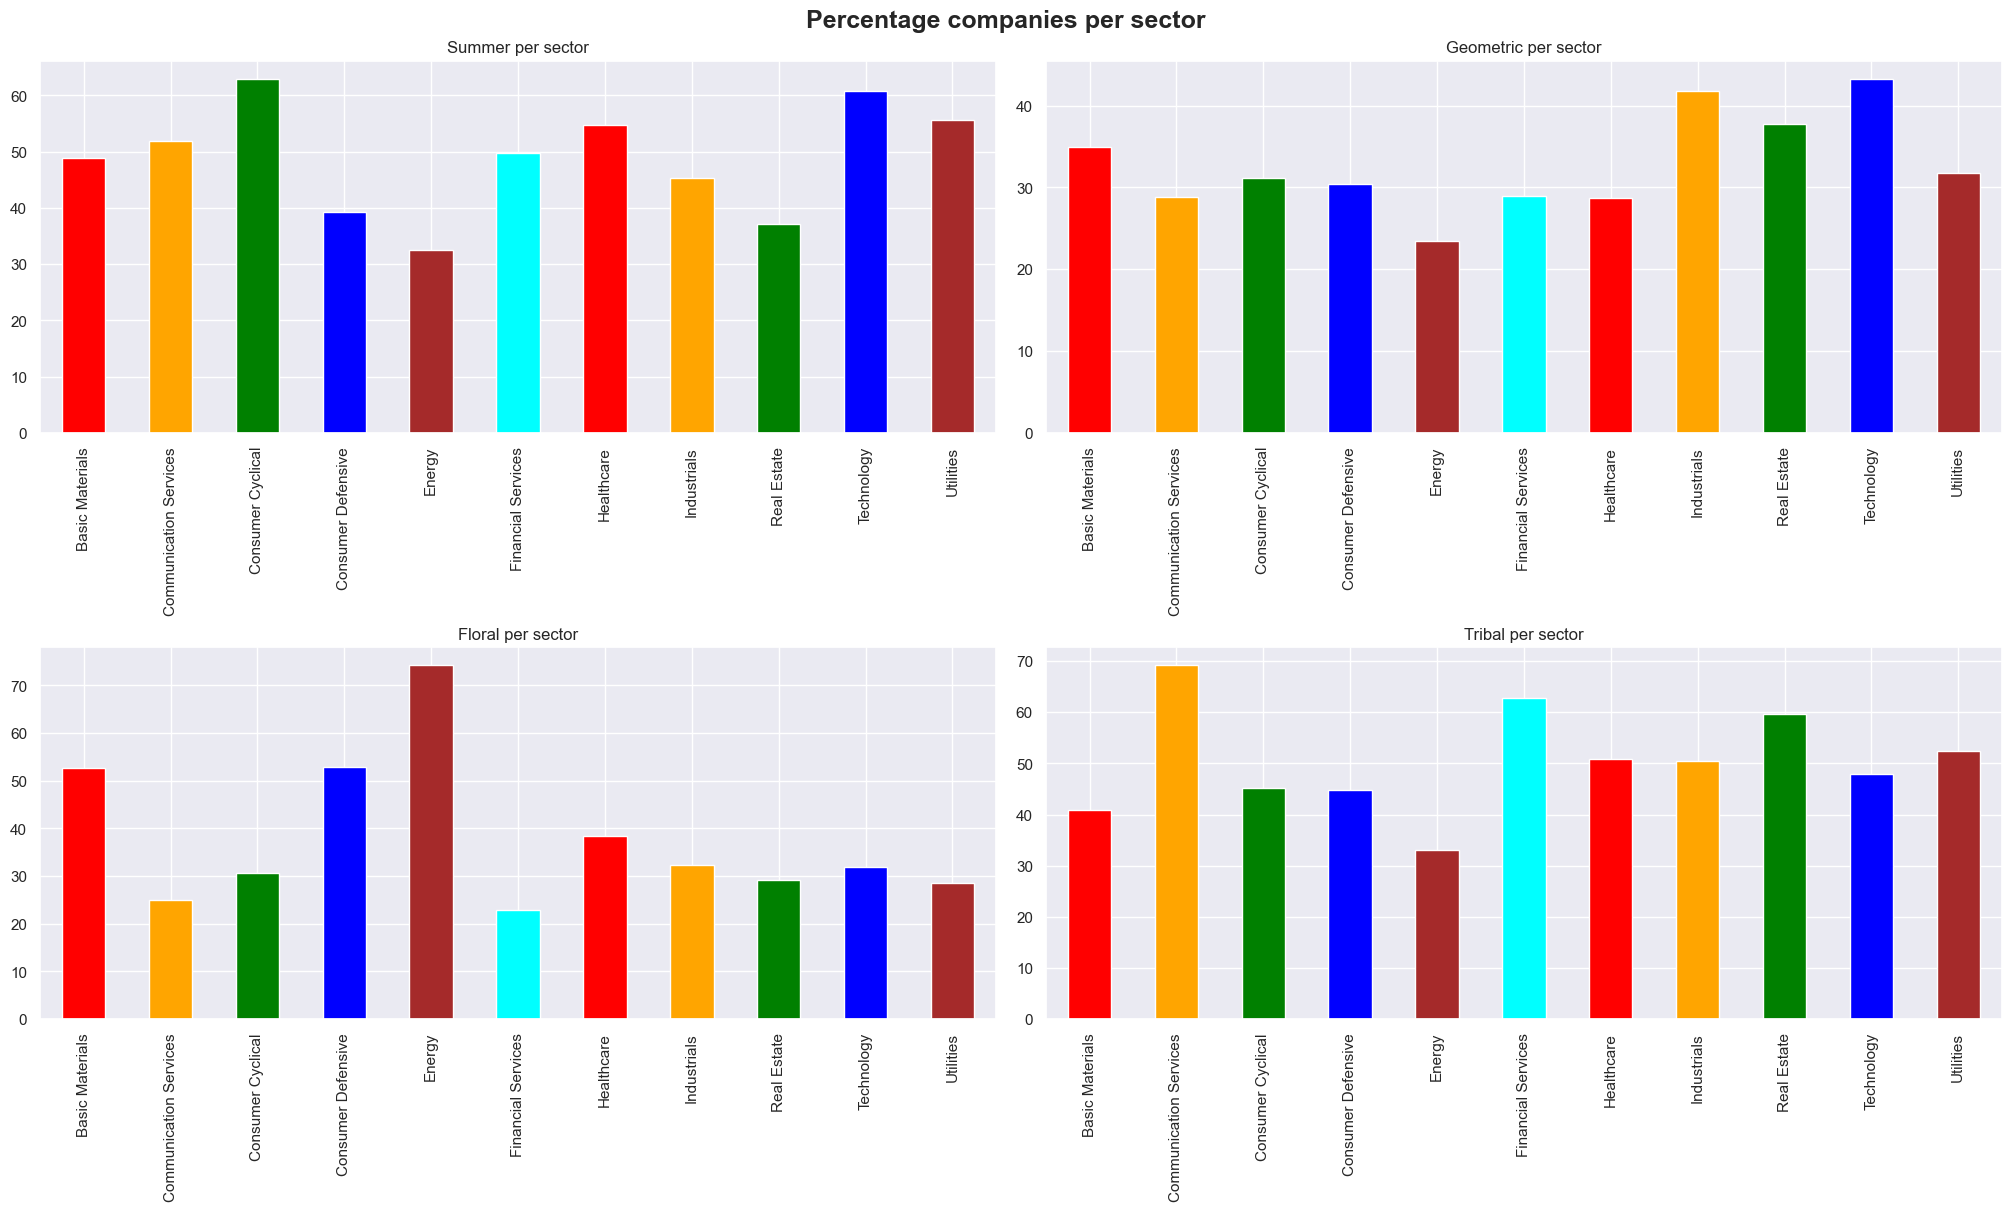

In [222]:
from matplotlib import pyplot as plt

## Segmentation for Profession

plt.figure(figsize=(20,12),constrained_layout = True)

color_list = ["red","orange","green","blue","brown","cyan"]
plt.suptitle("Percentage companies per sector", fontweight="bold", fontsize ='18')
plt.rcParams['font.size'] = '16'


plt.subplot(2,2,1)
ax = (df_cleaned.sector[df_cleaned['Summer Shapes']==1].value_counts()/df_cleaned.sector.value_counts()*100).plot(kind='bar',color=color_list)
ax.set_title("Summer per sector")

plt.subplot(2,2,2)
ax = (df_cleaned.sector[df_cleaned['Geometric Shapes']==1].value_counts()/df_cleaned.sector.value_counts()*100).plot(kind='bar',color=color_list)
ax.set_title("Geometric per sector")

plt.subplot(2,2,3)
ax = (df_cleaned.sector[df_cleaned['Floral Shapes']==1].value_counts()/df_cleaned.sector.value_counts()*100).plot(kind='bar',color=color_list)
ax.set_title("Floral per sector")

plt.subplot(2,2,4)
ax = (df_cleaned.sector[df_cleaned['Tribal Shapes']==1].value_counts()/df_cleaned.sector.value_counts()*100).plot(kind='bar',color=color_list)
ax.set_title("Tribal per sector")

In [223]:
test= df_cleaned.to_numpy()
df_cleaned

,company name,short name,industry,sector,colors,Cleand_Final Description,Geometric Shapes,Floral Shapes,Summer Shapes,Tribal Shapes,ColorCode(1),ColorCode(2),ColorCode(3),sectorNumber,industryNumber,ColorCodeNumber(1),ColorCodeNumber(2),ColorCodeNumber(3)
2,Bank OZK,Bank OZK,Banks,Financial Services,"#414141,#ffffff,#e40046",bank ozarks inc operate financial domain unite...,0,1,1,0,#414141,#ffffff,#e40046,5,7,1358,1263,2093
5,Western New England Bancorp Inc.,Western New England Bancorp,Banks,Financial Services,"#00565d,#f7ecb5,#e44b26",western new england bancorp inc subsidiaries p...,0,0,0,1,#00565d,#f7ecb5,#e44b26,5,7,243,1011,2100
6,Dolby Laboratories,Dolby Laboratories,Entertainment,Consumer Cyclical,"#3E44FE,#FFFFFF,#252319",dolby laboratories inc audio image technologie...,0,0,1,0,#3E44FE,#FFFFFF,#252319,2,27,1304,384,915
7,Barclays PLC,Barclays PLC,Banks,Financial Services,"#060005,#f2fbfe,#5d5ae5",barclays plc financial service provider engage...,0,0,0,1,#060005,#f2fbfe,#5d5ae5,5,7,578,943,1315
8,First BanCorp.,First BanCorp.,Banks,Financial Services,"#482404,#ffffff,#00833c",first bancorp financial hold company operate s...,0,1,1,0,#482404,#ffffff,#00833c,5,7,1398,1263,314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6316,Eagle Capital Growth Fund Inc.,Eagle Capital Growth Fund,Asset Management,Financial Services,"#000000,#a5c6e7,#005bb7",eagle capital growth fund inc diversify closed...,1,0,0,0,#000000,#a5c6e7,#005bb7,5,5,0,408,158
6317,CVB Financial Corporation,CVB Financial,Banks,Financial Services,"#107AB7,#FFFFFF,#DCDBE2,#7A003B",cvb financial corp bank hold company citizens ...,0,0,0,1,#107AB7,#FFFFFF,#DCDBE2,5,7,793,384,1655
6318,Geospace Technologies Corporation,Geospace,Oil & Gas - Services,Energy,"#003172,#3499cd,#787979",geospace technologies corp engage design manuf...,1,1,0,1,#003172,#3499cd,#787979,4,50,111,43,1453
6321,Viad Corp,Viad,Business Services,Industrials,"#070512,#ca3dfe,#056db7",viad corp unite state base market company comp...,1,0,1,1,#070512,#ca3dfe,#056db7,7,13,598,594,562


In [224]:
x= df_cleaned[['sectorNumber','industryNumber','ColorCodeNumber(1)','ColorCodeNumber(2)','ColorCodeNumber(3)']]
y_Geometric= df_cleaned['Geometric Shapes']
y_Summer= df_cleaned['Summer Shapes']
y_Tribal= df_cleaned['Tribal Shapes']
y_Floral= df_cleaned['Floral Shapes']


In [225]:
y_Summer

2       1
5       0
6       1
7       0
8       1
       ..
6316    0
6317    0
6318    0
6321    1
6322    0
Name: Summer Shapes, Length: 3196, dtype: int64

In [230]:
import whylogs as why

results = why.log(df_cleaned)
profile_view = results.view()

In [231]:
profile_view.to_pandas()

,cardinality/est,cardinality/lower_1,cardinality/upper_1,counts/inf,counts/n,counts/nan,counts/null,distribution/max,distribution/mean,distribution/median,...,distribution/stddev,frequent_items/frequent_strings,type,types/boolean,types/fractional,types/integral,types/object,types/string,ints/max,ints/min
column,,,,,,,,,,,,,,,,,,,,,
Cleand_Final Description,3019.399451,2980.838570,3058.921736,0,3196,0,0,NaN,0.000000,NaN,...,0.000000,[],SummaryType.COLUMN,0,0,0,0,3196,NaN,NaN
ColorCode(1),1993.971679,1968.506580,2020.071676,0,3196,0,0,NaN,0.000000,NaN,...,0.000000,"[FrequentItem(value='#000000', est=422, upper=...",SummaryType.COLUMN,0,0,0,0,3196,NaN,NaN
ColorCode(2),1279.017920,1262.683526,1295.759563,0,3196,0,0,NaN,0.000000,NaN,...,0.000000,"[FrequentItem(value='#ffffff', est=1309, upper...",SummaryType.COLUMN,0,0,0,0,3196,NaN,NaN
ColorCode(3),2477.230731,2445.593909,2509.656324,0,3196,0,0,NaN,0.000000,NaN,...,0.000000,"[FrequentItem(value='#0b313a', est=70, upper=7...",SummaryType.COLUMN,0,0,0,0,3196,NaN,NaN
ColorCodeNumber(1),1989.826680,1964.414517,2015.872421,0,3196,0,0,1968.0,882.383605,909.0,...,603.576133,"[FrequentItem(value='0.000000', est=422, upper...",SummaryType.COLUMN,0,0,3196,0,0,1968.0,0.0
ColorCodeNumber(2),1285.024993,1268.613883,1301.845266,0,3196,0,0,1263.0,884.568523,1046.0,...,418.536360,"[FrequentItem(value='1263.000000', est=1309, u...",SummaryType.COLUMN,0,0,3196,0,0,1263.0,0.0
ColorCodeNumber(3),2506.082881,2474.077587,2538.886133,0,3196,0,0,2494.0,1221.036608,1199.0,...,742.043307,"[FrequentItem(value='636.000000', est=70, uppe...",SummaryType.COLUMN,0,0,3196,0,0,2494.0,0.0
Floral Shapes,2.000000,2.000000,2.000100,0,3196,0,0,1.0,0.347622,0.0,...,0.476290,"[FrequentItem(value='0.000000', est=2085, uppe...",SummaryType.COLUMN,0,0,3196,0,0,1.0,0.0
Geometric Shapes,2.000000,2.000000,2.000100,0,3196,0,0,1.0,0.333229,0.0,...,0.471441,"[FrequentItem(value='0.000000', est=2131, uppe...",SummaryType.COLUMN,0,0,3196,0,0,1.0,0.0


In [244]:
from whylogs.core.constraints import (Constraints,
                                     ConstraintsBuilder,
                                     MetricsSelector,
                                     MetricConstraint)

builder = ConstraintsBuilder(profile_view)

# Define a constraint for validating data
builder.add_constraint(MetricConstraint(
   name="Summer Shapes < 2",
   condition=lambda x: x.max < 2,
   metric_selector=MetricsSelector(metric_name='distribution',
                                   column_name='Summer Shapes')
))
# Build the constraints and return the report
constraints: Constraints = builder.build()
constraints.report()

C:\Users\Ammar Almasri\AppData\Local\Temp\ipykernel_18612\747943833.py:17: DeprecationWarning: Please use generate_constraints_report()
  constraints.report()


[('Summer Shapes < 2', 1, 0)]

In [245]:

# Define a constraint for validating data
builder.add_constraint(MetricConstraint(
   name="Geometric Shapes < 2",
   condition=lambda x: x.max < 2,
   metric_selector=MetricsSelector(metric_name='distribution',
                                   column_name='Geometric Shapes')
))
# Build the constraints and return the report
constraints: Constraints = builder.build()
constraints.report()

C:\Users\Ammar Almasri\AppData\Local\Temp\ipykernel_18612\3551938380.py:10: DeprecationWarning: Please use generate_constraints_report()
  constraints.report()


[('Summer Shapes < 2', 1, 0), ('Geometric Shapes < 2', 1, 0)]

In [246]:
from whylogs.viz import NotebookProfileVisualizer

visualization = NotebookProfileVisualizer()
visualization.constraints_report(constraints, cell_height=300)

In [ ]:
from whylogs.core.constraints import (Constraints,
                                     ConstraintsBuilder,
                                     MetricsSelector,
                                     MetricConstraint)

builder = ConstraintsBuilder(profile_view)

# Define a constraint for validating data
builder.add_constraint(MetricConstraint(
   name=" > 0",
   condition=lambda x: x.min > 0,
   metric_selector=MetricsSelector(metric_name='distribution',
                                   column_name='weight')
))
# Build the constraints and return the report
constraints: Constraints = builder.build()
constraints.report()

In [226]:
import matplotlib.pyplot as plt
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions
def knn_comparison(x,y, k):
 clf = neighbors.KNeighborsClassifier(n_neighbors=k)
 clf.fit(x, y)
# Plotting decision region
 plot_decision_regions(x, y, clf=clf, legend=2)
# Adding axes annotations
 plt.xlabel('x')
 plt.ylabel('y')
 plt.title('y'+ str(k))
 plt.show()

In [227]:
from sklearn.neighbors import KNeighborsClassifier
x_train, x_test, y_train, y_test= train_test_split(x,y_Geometric, test_size= 0.20, random_state=0)
knnGeometric = KNeighborsClassifier(n_neighbors=2)
knnGeometric.fit(x_train, y_train)
y_pred_train = knnGeometric.predict(x_train)
y_pred_test = knnGeometric.predict(x_test)
print('Accuracy traindata')
print(accuracy_score(y_train, y_pred_train))
print('')
print('Accuracy testdata')
print(accuracy_score(y_test, y_pred_test))

Accuracy traindata
0.8012519561815337

Accuracy testdata
0.6703125


In [228]:
x_train

,sectorNumber,industryNumber,ColorCodeNumber(1),ColorCodeNumber(2),ColorCodeNumber(3)
6219,5,5,70,418,26
3070,2,53,977,136,2251
1074,6,10,1614,1142,2029
4040,5,7,1165,1263,1896
3820,1,17,1483,271,1248
...,...,...,...,...,...
1497,9,51,0,1098,396
1627,5,5,1599,1263,447
3197,6,40,1688,1263,674
5103,9,18,0,1263,157


In [229]:
knn_comparison(x_train,y_Geometric,1)

ValueError: Found input variables with inconsistent numbers of samples: [2556, 3196]

In [ ]:
pickle.dump(knnGeometric,open('GeometricModel.pkl','wb'))

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x,y_Tribal, test_size= 0.20, random_state=0)
knnTribal = KNeighborsClassifier(n_neighbors=2)
knnTribal.fit(x_train, y_train)
y_pred_train = knnTribal.predict(x_train)
y_pred_test = knnTribal.predict(x_test)
print('Accuracy traindata')
print(accuracy_score(y_train, y_pred_train))
print('')
print('Accuracy testdata')
print(accuracy_score(y_test, y_pred_test))
pickle.dump(knnTribal,open('TribalModel.pkl','wb'))

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x,y_Floral, test_size= 0.20, random_state=0)
knnFloral = KNeighborsClassifier(n_neighbors=2)
knnFloral.fit(x_train, y_train)
y_pred_train = knnFloral.predict(x_train)
y_pred_test = knnFloral.predict(x_test)
print('Accuracy traindata')
print(accuracy_score(y_train, y_pred_train))
print('')
print('Accuracy testdata')
print(accuracy_score(y_test, y_pred_test))
pickle.dump(knnFloral,open('FloralModel.pkl','wb'))

In [ ]:


# Plotting decision region
plot_decision_regions(x_train, y_train, clf=knnFloral, legend=2)

# Adding axes annotations

plt.xlabel('X')
plt.ylabel('')
plt.title('Knn with K='+ str(2))
plt.show()

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x,y_Summer, test_size= 0.20, random_state=0)
knnSummer = KNeighborsClassifier(n_neighbors=2)
knnSummer.fit(x_train, y_train)
y_pred_train = knnSummer.predict(x_train)
y_pred_test = knnSummer.predict(x_test)
print('Accuracy traindata')
print(accuracy_score(y_train, y_pred_train))
print('')
print('Accuracy testdata')
print(accuracy_score(y_test, y_pred_test))
pickle.dump(knnSummer,open('SummerModel.pkl','wb'))